<a href="https://colab.research.google.com/github/naticanci/Masters_Python_Thesis/blob/naticanci-patch-1/Thesis_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT-Install**

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install fiona
!pip install geopandas
!pip install geojson
!pip install mapclassify
!pip install plotly_express==0.4.0
import pandas as pd
import numpy as np
import fiona
fiona.supported_drivers
import geopandas as gpd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

import folium
from matplotlib import colors
from matplotlib.colors import TwoSlopeNorm
import mapclassify as mc


In [3]:
import re
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Polygon
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.pipeline import Pipeline, make_pipeline

Read current data merged of DHS

# **READ FILES DHS COMPLETE AND COUNTRIES ADMINISTRATIVES**

file antro complete with lon and lat


In [ ]:
df_dhs_complete = pd.read_stata("/content/drive/MyDrive/MASTERS/Thesis_Python/child_anthro_gps_Ylag.dta")
df_dhs_complete.head()

<ipython-input-18-ab0e1bf0cf0b>:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_dhs_complete = pd.read_stata("/content/drive/MyDrive/MASTERS/Thesis_Python/child_anthro_gps_Ylag.dta")


,child_who_wght4age_z,child_who_hght4age_z,child_who_bmi4age_z,child_who_wght4hght_z,child_who_wght4hght_fl,child_who_hght4age_fl,child_who_wght4age_fl,child_who_bmi4age_fl,caseid,country,...,si10,tcc,elevation,t2y,_merge_clim_matrix,lat_dec,t2meanLL,grid_cell,grid_date,_merge
0,-0.79,-1.99,0.57,0.17,0.0,0.0,0.0,0.0,292 79 2,lesotho,...,NaN,NaN,NaN,NaN,Master only (1),0.411189,NaN,NaN,NaN,Master only (1)
1,-1.47,-1.55,-0.78,-0.64,0.0,0.0,0.0,0.0,292 4 3,lesotho,...,NaN,NaN,NaN,NaN,Master only (1),0.411189,NaN,NaN,NaN,Master only (1)
2,0.09,-0.55,0.60,0.54,0.0,0.0,0.0,0.0,292263 3,lesotho,...,NaN,NaN,NaN,NaN,Master only (1),0.411189,NaN,NaN,NaN,Master only (1)
3,-1.59,-1.37,-1.08,-1.15,0.0,0.0,0.0,0.0,292 79 2,lesotho,...,NaN,NaN,NaN,NaN,Master only (1),0.411189,NaN,NaN,NaN,Master only (1)
4,0.67,0.31,0.68,0.72,0.0,0.0,0.0,0.0,292263 3,lesotho,...,NaN,NaN,NaN,NaN,Master only (1),0.411189,NaN,NaN,NaN,Master only (1)


In [ ]:
df_dhs_complete = df_dhs_complete.dropna(subset=['t2m']).reset_index()

In [ ]:
unique_values = df_dhs_complete['country'].unique()
unique_values = pd.DataFrame({'country': unique_values})
unique_values

,country
0,lesotho
1,namibia
2,swaziland
3,mozambique
4,madagascar
5,bolivia
6,zimbabwe
7,peru
8,zambia
9,angola


Rename variables

In [ ]:
df_dhs_complete.rename(columns = {'child_who_wght4age_z':'WAZ', 'child_who_hght4age_z':'HAZ','child_who_wght4hght_z':'WHZ','t2m':'Monthly_Temperature',
                                  'child_age_mnths': 'Age_in_months','female': 'Female', 'male': 'Male', 'rural': 'Rural', 'birth_order': 'Birth_order',
                                  'age': 'Mothers_age','married': 'Married','total_children':'Total_children','water_source_who_unimproved':'Water_source_unimproved',
                                  'edu_primary': 'Education_primary', 'edu_secondary': 'Education_secundary','edu_higher': 'Education_higher','elevation': 'Elevation',  'ALT_DEM': 'Altitude_DEM' }, inplace = True)

**Create  dataframes exclusive to WA,HA, and WH**

In [ ]:
WAZ_Dta = df_dhs_complete.loc[(df_dhs_complete['child_who_wght4age_fl'] ==0) & (df_dhs_complete['Age_in_months'] > 12), :]
HAZ_Dta = df_dhs_complete.loc[(df_dhs_complete['child_who_hght4age_fl'] ==0) & (df_dhs_complete['Age_in_months'] > 12), :]
WHZ_Dta = df_dhs_complete.loc[(df_dhs_complete['child_who_wght4hght_fl'] ==0) & (df_dhs_complete['Age_in_months'] > 12), :]


In [ ]:
WAZ_Dta.info()

In [ ]:
#WAZ_Dta.to_stata('/content/drive/MyDrive/MASTERS/Thesis_Python/WAZ_Dta_GDP_PC.dta')
#HAZ_Dta.to_stata('/content/drive/MyDrive/MASTERS/Thesis_Python/HAZ_Dta_GDP_PC.dta')
#WHZ_Dta.to_stata('/content/drive/MyDrive/MASTERS/Thesis_Python/WHZ_Dta_GDP_PC.dta')

Unique values of countries

In [ ]:
#df_dhs_coordinates = df_dhs_complete[['country']]
#df_dhs_coordinates_unq = df_dhs_coordinates.drop_duplicates(ignore_index=True)

#df_dhs_unq = df_dhs_coordinates_unq.sort_values('country').reset_index(drop=True)
#df_dhs_unq.head()

From https://datacatalog.worldbank.org/search/dataset/0038272/World-Bank-Official-Boundaries

Read administrative boundaries countries

In [ ]:
df_WB2 = gpd.read_file('/content/drive/MyDrive/MASTERS/Thesis_Python/WB_countries_Admin0_10m.shp')


In [ ]:
categorias = df_WB2['CONTINENT'].unique()
print(categorias)
categorias2 = df_WB2['REGION_WB'].unique()
print(categorias2)
categorias3 = df_WB2['SUBREGION'].unique()
print(categorias3)
categorias4 = df_WB2['REGION_UN'].unique()
print(categorias4)
categorias5 = df_WB2['ECONOMY'].unique()
print(categorias5)

['Asia' 'South America' 'Africa' 'Europe' 'North America' 'Oceania'
 'Seven seas (open ocean)']
['East Asia & Pacific' 'Latin America & Caribbean' 'Europe & Central Asia'
 'South Asia' 'Middle East & North Africa' 'Sub-Saharan Africa'
 'North America' 'Antarctica']
['South-Eastern Asia' 'South America' 'Western Asia' 'Southern Asia'
 'Eastern Asia' 'Eastern Africa' 'Western Europe' 'Northern Africa'
 'Central America' 'Middle Africa' 'Eastern Europe' 'Southern Africa'
 'Caribbean' 'Central Asia' 'Northern Europe' 'Southern Europe'
 'Western Africa' 'Northern America' 'Melanesia'
 'Australia and New Zealand' 'Polynesia' 'Seven seas (open ocean)'
 'Micronesia']
['Asia' 'Americas' 'Africa' 'Europe' 'Oceania' 'Seven seas (open ocean)']
['4. Emerging region: MIKT' '6. Developing region'
 '5. Emerging region: G20' '3. Emerging region: BRIC'
 '2. Developed region: nonG7' '7. Least developed region'
 '1. Developed region: G7']


In [ ]:
df_WB3=df_WB2[['WB_NAME','ISO_A3','CONTINENT','REGION_WB','SUBREGION','REGION_UN','ECONOMY']]
df_WB3['WB_NAME'] = df_WB3['WB_NAME'].map(str.lower)
#df_WB2.info()
df_WB3

<ipython-input-24-a5363ad440cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WB3['WB_NAME'] = df_WB3['WB_NAME'].map(str.lower)


,WB_NAME,ISO_A3,CONTINENT,REGION_WB,SUBREGION,REGION_UN,ECONOMY
0,indonesia,IDN,Asia,East Asia & Pacific,South-Eastern Asia,Asia,4. Emerging region: MIKT
1,malaysia,MYS,Asia,East Asia & Pacific,South-Eastern Asia,Asia,6. Developing region
2,chile,CHL,South America,Latin America & Caribbean,South America,Americas,5. Emerging region: G20
3,bolivia,BOL,South America,Latin America & Caribbean,South America,Americas,5. Emerging region: G20
4,peru,PER,South America,Latin America & Caribbean,South America,Americas,5. Emerging region: G20
...,...,...,...,...,...,...,...
246,navassa island (us),UMI,North America,East Asia & Pacific,Seven seas (open ocean),Seven seas (open ocean),7. Least developed region
247,palmyra atoll (us),UMI,North America,East Asia & Pacific,Seven seas (open ocean),Seven seas (open ocean),7. Least developed region
248,kingman reef (us),UMI,North America,East Asia & Pacific,Seven seas (open ocean),Seven seas (open ocean),7. Least developed region
249,tokelau (nz),NZL,Oceania,East Asia & Pacific,Australia and New Zealand,Oceania,2. Developed region: nonG7


change names of countries as DHS file to merge

In [ ]:
df_WB3 = df_WB3.replace(['burkina faso'], 'burkina_faso')
df_WB3 = df_WB3.replace(['central african republic'], 'central_african_republic')
df_WB3 = df_WB3.replace(['congo, democratic republic of'], 'congo_drc')
df_WB3 = df_WB3.replace(["côte d'ivoire"], 'cote_divoire')
df_WB3 = df_WB3.replace(["kyrgyz republic"], 'kyrgyz_republic')
df_WB3 = df_WB3.replace(["sierra leone"], 'sierra_leone')
df_WB3 = df_WB3.replace(["timor-leste"], 'timor_leste')
df_WB3 = df_WB3.replace(["egypt, arab republic of"], 'egypt')
df_WB3 = df_WB3.replace(["eswatini"], 'swaziland')
df_WB3 = df_WB3.replace(["dominican republic"], 'dominican_republic')

df_WB3.head()

,WB_NAME,ISO_A3,CONTINENT,REGION_WB,SUBREGION,REGION_UN,ECONOMY
0,indonesia,IDN,Asia,East Asia & Pacific,South-Eastern Asia,Asia,4. Emerging region: MIKT
1,malaysia,MYS,Asia,East Asia & Pacific,South-Eastern Asia,Asia,6. Developing region
2,chile,CHL,South America,Latin America & Caribbean,South America,Americas,5. Emerging region: G20
3,bolivia,BOL,South America,Latin America & Caribbean,South America,Americas,5. Emerging region: G20
4,peru,PER,South America,Latin America & Caribbean,South America,Americas,5. Emerging region: G20


In [ ]:
#centroids = df_WB3.centroid

# convert the centroid points to lat-long coordinates
#latitudes = centroids.y
#longitudes = centroids.x

# add the lat-long coordinates as new columns in the GeoDataFrame
#df_WB3['latitude'] = latitudes
#df_WB3['longitude'] = longitudes

marge DHS complete with  geometries and ISO column

In [ ]:
merged_DHS_GEO_ISO = df_dhs_complete.merge(df_WB3, left_on='country', right_on='WB_NAME')
merged_DHS_GEO_ISO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575503 entries, 0 to 575502
Data columns (total 99 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   index                     575503 non-null  int64   
 1   WAZ                       573969 non-null  float64 
 2   HAZ                       570917 non-null  float64 
 3   child_who_bmi4age_z       569383 non-null  float64 
 4   WHZ                       564942 non-null  float64 
 5   child_who_wght4hght_fl    564942 non-null  float32 
 6   child_who_hght4age_fl     570917 non-null  float32 
 7   child_who_wght4age_fl     573969 non-null  float32 
 8   child_who_bmi4age_fl      569383 non-null  float32 
 9   caseid                    575503 non-null  object  
 10  country                   575503 non-null  object  
 11  adm_region                575503 non-null  object  
 12  cluster_id                575503 non-null  int32   
 13  dhscc                     575

In [ ]:
#merge_country = unique_values.merge(df_WB3, left_on='country', right_on='WB_NAME')
#merge_country.head()

,country,WB_NAME,ISO_A3,CONTINENT,REGION_WB,SUBREGION,REGION_UN,ECONOMY,geometry
0,lesotho,lesotho,LSO,Africa,Sub-Saharan Africa,Southern Africa,Africa,7. Least developed region,"POLYGON ((28.98085 -28.90904, 28.99542 -28.908..."
1,namibia,namibia,NAM,Africa,Sub-Saharan Africa,Southern Africa,Africa,6. Developing region,"POLYGON ((16.48707 -28.57293, 16.46852 -28.585..."
2,swaziland,swaziland,SWZ,Africa,Sub-Saharan Africa,Southern Africa,Africa,6. Developing region,"POLYGON ((31.94924 -25.95810, 31.97529 -25.980..."
3,mozambique,mozambique,MOZ,Africa,Sub-Saharan Africa,Eastern Africa,Africa,7. Least developed region,"MULTIPOLYGON (((32.11388 -26.84001, 32.11740 -..."
4,madagascar,madagascar,MDG,Africa,Sub-Saharan Africa,Eastern Africa,Africa,7. Least developed region,"MULTIPOLYGON (((44.25473 -20.37607, 44.25131 -..."


In [ ]:
merged_DHS_GEO_ISO.to_stata('/content/drive/MyDrive/MASTERS/Thesis_Python/DHS_TEMP_REGIONS.dta')

In [ ]:
WAZ_Dta = merged_DHS_GEO_ISO.loc[(merged_DHS_GEO_ISO['child_who_wght4age_fl'] ==0) & (merged_DHS_GEO_ISO['Age_in_months'] > 12), :]
HAZ_Dta = merged_DHS_GEO_ISO.loc[(merged_DHS_GEO_ISO['child_who_hght4age_fl'] ==0) & (merged_DHS_GEO_ISO['Age_in_months'] > 12), :]
WHZ_Dta = merged_DHS_GEO_ISO.loc[(merged_DHS_GEO_ISO['child_who_wght4hght_fl'] ==0) & (merged_DHS_GEO_ISO['Age_in_months'] > 12), :]


In [ ]:
WAZ_Dta.info()

In [ ]:
WAZ_Dta.to_stata('/content/drive/MyDrive/MASTERS/Thesis_Python/WAZ_Dta2.dta')
HAZ_Dta.to_stata('/content/drive/MyDrive/MASTERS/Thesis_Python/HAZ_Dta2.dta')
WHZ_Dta.to_stata('/content/drive/MyDrive/MASTERS/Thesis_Python/WHZ_Dta2.dta')

read file GDP wirh values of interest

In [ ]:
gdp = pd.read_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4898871.csv')
gdp=gdp.drop(['Indicator Name', 'Indicator Code','Unnamed: 66','Country Name'], axis=1)
gdp.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09
1,AFE,2.129081e+10,2.180870e+10,2.370727e+10,2.821034e+10,2.611906e+10,2.968249e+10,3.223946e+10,3.351491e+10,3.652187e+10,...,9.725734e+11,9.834729e+11,1.003768e+12,9.245228e+11,8.827213e+11,1.021119e+12,1.007240e+12,1.001017e+12,9.274845e+11,1.080712e+12
2,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,2.020357e+10,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.478686e+10
3,AFW,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,1.442604e+10,1.488035e+10,...,7.360399e+11,8.322169e+11,8.924979e+11,7.669580e+11,6.905454e+11,6.837480e+11,7.663597e+11,7.947191e+11,7.847997e+11,8.401873e+11
4,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.249982e+11,1.334016e+11,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.361907e+10,6.740429e+10


change columns for rows

In [ ]:
melted_gdp = pd.melt(gdp, id_vars=["Country Code"], var_name='Year', value_name='GDP')
melted_gdp=melted_gdp.dropna()

In [ ]:
melted_gdp

,Country Code,Year,GDP
1,AFE,1960,2.129081e+10
2,AFG,1960,5.377778e+08
3,AFW,1960,1.040414e+10
13,AUS,1960,1.860567e+10
14,AUT,1960,6.592694e+09
...,...,...,...
16486,WSM,2021,8.438424e+08
16487,XKX,2021,9.412034e+09
16489,ZAF,2021,4.190150e+11
16490,ZMB,2021,2.214763e+10


In [ ]:
melted_gdp['ln_GDP'] = np.log(melted_gdp['GDP'])
melted_gdp['Year'] = melted_gdp['Year'].astype('float32')

In [ ]:
melted_gdp.rename(columns = {'Country Code':'ISO_A3', 'Year':'year'}, inplace = True)
melted_gdp

,ISO_A3,year,GDP,ln_GDP
1,AFE,1960.0,2.129081e+10,23.781541
2,AFG,1960.0,5.377778e+08,20.102956
3,AFW,1960.0,1.040414e+10,23.065469
13,AUS,1960.0,1.860567e+10,23.646732
14,AUT,1960.0,6.592694e+09,22.609228
...,...,...,...,...
16486,WSM,2021.0,8.438424e+08,20.553476
16487,XKX,2021.0,9.412034e+09,22.965255
16489,ZAF,2021.0,4.190150e+11,26.761173
16490,ZMB,2021.0,2.214763e+10,23.820997


read file GDP_pC with values of interest

In [ ]:
gdp_pc = pd.read_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_5358417.csv')
gdp_pc=gdp_pc.drop(['Indicator Name', 'Indicator Code','Unnamed: 66','Country Name'], axis=1)
gdp_pc.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25609.955724,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30220.594523,31650.760537,24487.863560,29342.100858
1,AFE,162.913034,162.551683,172.002460,199.189238,179.387799,198.230368,209.414665,211.707060,224.239783,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730
2,AFG,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,134.012768,...,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
3,AFW,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,142.895375,127.303606,128.365494,...,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626
4,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757


In [ ]:
melted_gdp_pc = pd.melt(gdp_pc, id_vars=["Country Code"], var_name='Year', value_name='GDP_PC')
melted_gdp_pc=melted_gdp_pc.dropna()

In [ ]:
melted_gdp_pc

In [ ]:
melted_gdp_pc['ln_GDP_PC'] = np.log(melted_gdp_pc['GDP_PC'])
melted_gdp_pc['Year'] = melted_gdp_pc['Year'].astype('float32')

In [ ]:
melted_gdp_pc.rename(columns = {'Country Code':'ISO_A3', 'Year':'year'}, inplace = True)

merge GDP_PC and df_WB3 to get country name

In [ ]:
merged_GDP_PC = melted_gdp_pc.merge(df_WB3)
#merged_GDP_PC.drop(columns=['geometry'], inplace=True)
merged_GDP_PC=merged_GDP_PC.rename(columns={'WB_NAME':'country'})
merged_GDP_PC

,ISO_A3,year,GDP_PC,ln_GDP_PC,country,CONTINENT,REGION_WB,SUBREGION,REGION_UN,ECONOMY
0,AFG,1960.0,62.369375,4.133074,afghanistan,Asia,South Asia,Southern Asia,Asia,7. Least developed region
1,AFG,1961.0,62.443703,4.134265,afghanistan,Asia,South Asia,Southern Asia,Asia,7. Least developed region
2,AFG,1962.0,60.950364,4.110060,afghanistan,Asia,South Asia,Southern Asia,Asia,7. Least developed region
3,AFG,1963.0,82.021738,4.406984,afghanistan,Asia,South Asia,Southern Asia,Asia,7. Least developed region
4,AFG,1964.0,85.511073,4.448646,afghanistan,Asia,South Asia,Southern Asia,Asia,7. Least developed region
...,...,...,...,...,...,...,...,...,...,...
10461,SXM,2014.0,33043.688381,10.405586,sint maarten (neth.),North America,Latin America & Caribbean,Caribbean,Americas,6. Developing region
10462,SXM,2015.0,32274.890552,10.382045,sint maarten (neth.),North America,Latin America & Caribbean,Caribbean,Americas,6. Developing region
10463,SXM,2016.0,31616.681699,10.361440,sint maarten (neth.),North America,Latin America & Caribbean,Caribbean,Americas,6. Developing region
10464,SXM,2017.0,29369.056828,10.287697,sint maarten (neth.),North America,Latin America & Caribbean,Caribbean,Americas,6. Developing region


In [ ]:
merged_GDP_PC_DHS = df_dhs_complete.merge(merged_GDP_PC)
merged_GDP_PC_DHS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575503 entries, 0 to 575502
Data columns (total 100 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   index                     575503 non-null  int64   
 1   WAZ                       573969 non-null  float64 
 2   HAZ                       570917 non-null  float64 
 3   child_who_bmi4age_z       569383 non-null  float64 
 4   WHZ                       564942 non-null  float64 
 5   child_who_wght4hght_fl    564942 non-null  float32 
 6   child_who_hght4age_fl     570917 non-null  float32 
 7   child_who_wght4age_fl     573969 non-null  float32 
 8   child_who_bmi4age_fl      569383 non-null  float32 
 9   caseid                    575503 non-null  object  
 10  country                   575503 non-null  object  
 11  adm_region                575503 non-null  object  
 12  cluster_id                575503 non-null  int32   
 13  dhscc                     57

In [ ]:
merged_GDP_PC_DHS.to_stata('/content/drive/MyDrive/MASTERS/Thesis_Python/merged_GDP_PC_DHS.dta')

In [ ]:
WAZ_Dta = merged_GDP_PC_DHS.loc[(merged_GDP_PC_DHS['child_who_wght4age_fl'] ==0) & (merged_GDP_PC_DHS['Age_in_months'] > 12), :]
HAZ_Dta = merged_GDP_PC_DHS.loc[(merged_GDP_PC_DHS['child_who_hght4age_fl'] ==0) & (merged_GDP_PC_DHS['Age_in_months'] > 12), :]
WHZ_Dta = merged_GDP_PC_DHS.loc[(merged_GDP_PC_DHS['child_who_wght4hght_fl'] ==0) & (merged_GDP_PC_DHS['Age_in_months'] > 12), :]
WAZ_Dta

In [ ]:
WAZ_Dta.to_stata('/content/drive/MyDrive/MASTERS/Thesis_Python/WAZ_Dta_GDP_PC.dta')
HAZ_Dta.to_stata('/content/drive/MyDrive/MASTERS/Thesis_Python/HAZ_Dta_GDP_PC.dta')
WHZ_Dta.to_stata('/content/drive/MyDrive/MASTERS/Thesis_Python/WHZ_Dta_GDP_PC.dta')

In [ ]:
#merged_GDP_PC_DHS.dropna(subset=['ln_GDP_PC'], inplace=True)
#merged_GDP_PC_DHS

,index,WAZ,HAZ,child_who_bmi4age_z,WHZ,child_who_wght4hght_fl,child_who_hght4age_fl,child_who_wght4age_fl,child_who_bmi4age_fl,caseid,...,t2y,_merge_clim_matrix,lat_dec,t2meanLL,grid_cell,grid_date,_merge,ISO_A3,GDP_PC,ln_GDP_PC
0,148,-1.16,-2.47,0.64,0.43,0.0,0.0,0.0,0.0,2246 3,...,12.984544,Matched (3),0.883417,12.984544,69.0,656.0,Matched (3),LSO,1165.045935,7.060516
1,149,-1.07,0.05,-1.50,-1.55,0.0,0.0,0.0,0.0,2219 2,...,12.984544,Matched (3),0.883417,12.984544,69.0,656.0,Matched (3),LSO,1165.045935,7.060516
2,150,-1.26,-0.92,-1.00,-1.15,0.0,0.0,0.0,0.0,2305 2,...,12.984544,Matched (3),0.883417,12.984544,69.0,656.0,Matched (3),LSO,1165.045935,7.060516
3,151,-1.15,-1.83,0.03,-0.17,0.0,0.0,0.0,0.0,2219 2,...,12.984544,Matched (3),0.883417,12.984544,69.0,656.0,Matched (3),LSO,1165.045935,7.060516
4,152,-0.42,-1.46,0.67,0.49,0.0,0.0,0.0,0.0,91 50 6,...,12.984544,Matched (3),0.727103,12.984544,69.0,656.0,Matched (3),LSO,1165.045935,7.060516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575498,669006,2.55,-0.28,3.77,3.67,0.0,0.0,0.0,0.0,255 9 2,...,9.336623,Matched (3),0.097636,9.336623,16878.0,546.0,Matched (3),MDA,1034.394030,6.941571
575499,669007,-0.52,-1.12,0.26,0.09,0.0,0.0,0.0,0.0,1617 3,...,9.336623,Matched (3),0.153039,9.336623,16878.0,546.0,Matched (3),MDA,1034.394030,6.941571
575500,669008,-1.14,-1.28,-0.50,-0.57,0.0,0.0,0.0,0.0,255 4 1,...,9.336623,Matched (3),0.097636,9.336623,16878.0,546.0,Matched (3),MDA,1034.394030,6.941571
575501,669009,-0.04,1.48,-1.19,-1.00,0.0,0.0,0.0,0.0,25530 2,...,9.336623,Matched (3),0.097636,9.336623,16878.0,546.0,Matched (3),MDA,1034.394030,6.941571


In [ ]:
temporal = merged_GDP_PC_DHS.groupby('country')['ln_GDP_PC'].mean().reset_index()
temporal = temporal.rename(columns={'ln_GDP_PC':'mean_ln_GDP_PC_country'})

merged_GDP_PC_DHS = merged_GDP_PC_DHS.merge(temporal)

#Monthly_Temperature_full = merged_GDP_PC_DHS['Monthly_Temperature'].mean()
#merged_GDP_PC_DHS['Monthly_Temperature_full_recenter'] = merged_GDP_PC_DHS['Monthly_Temperature']-Monthly_Temperature_full

In [ ]:
temporal.to_csv("/content/drive/MyDrive/MASTERS/Thesis_Python/mean_ln_pc.csv")

In [ ]:
merged_GDP_PC_DHS["recenter_ln_gdp_pc"] =merged_GDP_PC_DHS.ln_GDP_PC-merged_GDP_PC_DHS.mean_ln_GDP_PC_country
merged_GDP_PC_DHS

,index,WAZ,HAZ,child_who_bmi4age_z,WHZ,child_who_wght4hght_fl,child_who_hght4age_fl,child_who_wght4age_fl,child_who_bmi4age_fl,caseid,...,ISO_A3,GDP_PC,ln_GDP_PC,CONTINENT,REGION_WB,SUBREGION,REGION_UN,ECONOMY,mean_ln_GDP_PC_country,recenter_ln_gdp_pc
0,148,-1.16,-2.47,0.64,0.43,0.0,0.0,0.0,0.0,2246 3,...,LSO,1165.045935,7.060516,Africa,Sub-Saharan Africa,Southern Africa,Africa,7. Least developed region,6.820566,0.23995
1,149,-1.07,0.05,-1.50,-1.55,0.0,0.0,0.0,0.0,2219 2,...,LSO,1165.045935,7.060516,Africa,Sub-Saharan Africa,Southern Africa,Africa,7. Least developed region,6.820566,0.23995
2,150,-1.26,-0.92,-1.00,-1.15,0.0,0.0,0.0,0.0,2305 2,...,LSO,1165.045935,7.060516,Africa,Sub-Saharan Africa,Southern Africa,Africa,7. Least developed region,6.820566,0.23995
3,151,-1.15,-1.83,0.03,-0.17,0.0,0.0,0.0,0.0,2219 2,...,LSO,1165.045935,7.060516,Africa,Sub-Saharan Africa,Southern Africa,Africa,7. Least developed region,6.820566,0.23995
4,152,-0.42,-1.46,0.67,0.49,0.0,0.0,0.0,0.0,91 50 6,...,LSO,1165.045935,7.060516,Africa,Sub-Saharan Africa,Southern Africa,Africa,7. Least developed region,6.820566,0.23995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575498,669006,2.55,-0.28,3.77,3.67,0.0,0.0,0.0,0.0,255 9 2,...,MDA,1034.394030,6.941571,Europe,Europe & Central Asia,Eastern Europe,Europe,6. Developing region,6.941571,0.00000
575499,669007,-0.52,-1.12,0.26,0.09,0.0,0.0,0.0,0.0,1617 3,...,MDA,1034.394030,6.941571,Europe,Europe & Central Asia,Eastern Europe,Europe,6. Developing region,6.941571,0.00000
575500,669008,-1.14,-1.28,-0.50,-0.57,0.0,0.0,0.0,0.0,255 4 1,...,MDA,1034.394030,6.941571,Europe,Europe & Central Asia,Eastern Europe,Europe,6. Developing region,6.941571,0.00000
575501,669009,-0.04,1.48,-1.19,-1.00,0.0,0.0,0.0,0.0,25530 2,...,MDA,1034.394030,6.941571,Europe,Europe & Central Asia,Eastern Europe,Europe,6. Developing region,6.941571,0.00000


In [ ]:
WAZ_Dta = merged_GDP_PC_DHS.loc[(merged_GDP_PC_DHS['child_who_wght4age_fl'] ==0) & (merged_GDP_PC_DHS['Age_in_months'] > 12), :]
HAZ_Dta = merged_GDP_PC_DHS.loc[(merged_GDP_PC_DHS['child_who_hght4age_fl'] ==0) & (merged_GDP_PC_DHS['Age_in_months'] > 12), :]
WHZ_Dta = merged_GDP_PC_DHS.loc[(merged_GDP_PC_DHS['child_who_wght4hght_fl'] ==0) & (merged_GDP_PC_DHS['Age_in_months'] > 12), :]
HAZ_Dta

,index,WAZ,HAZ,child_who_bmi4age_z,WHZ,child_who_wght4hght_fl,child_who_hght4age_fl,child_who_wght4age_fl,child_who_bmi4age_fl,caseid,...,ISO_A3,GDP_PC,ln_GDP_PC,CONTINENT,REGION_WB,SUBREGION,REGION_UN,ECONOMY,mean_ln_GDP_PC_country,recenter_ln_gdp_pc
0,148,-1.16,-2.47,0.64,0.43,0.0,0.0,0.0,0.0,2246 3,...,LSO,1165.045935,7.060516,Africa,Sub-Saharan Africa,Southern Africa,Africa,7. Least developed region,6.820566,0.23995
2,150,-1.26,-0.92,-1.00,-1.15,0.0,0.0,0.0,0.0,2305 2,...,LSO,1165.045935,7.060516,Africa,Sub-Saharan Africa,Southern Africa,Africa,7. Least developed region,6.820566,0.23995
3,151,-1.15,-1.83,0.03,-0.17,0.0,0.0,0.0,0.0,2219 2,...,LSO,1165.045935,7.060516,Africa,Sub-Saharan Africa,Southern Africa,Africa,7. Least developed region,6.820566,0.23995
4,152,-0.42,-1.46,0.67,0.49,0.0,0.0,0.0,0.0,91 50 6,...,LSO,1165.045935,7.060516,Africa,Sub-Saharan Africa,Southern Africa,Africa,7. Least developed region,6.820566,0.23995
5,153,-1.90,-3.54,0.63,0.03,0.0,0.0,0.0,0.0,2180 3,...,LSO,1165.045935,7.060516,Africa,Sub-Saharan Africa,Southern Africa,Africa,7. Least developed region,6.820566,0.23995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575495,669003,0.06,0.19,-0.13,-0.05,0.0,0.0,0.0,0.0,1723 2,...,MDA,1034.394030,6.941571,Europe,Europe & Central Asia,Eastern Europe,Europe,6. Developing region,6.941571,0.00000
575498,669006,2.55,-0.28,3.77,3.67,0.0,0.0,0.0,0.0,255 9 2,...,MDA,1034.394030,6.941571,Europe,Europe & Central Asia,Eastern Europe,Europe,6. Developing region,6.941571,0.00000
575499,669007,-0.52,-1.12,0.26,0.09,0.0,0.0,0.0,0.0,1617 3,...,MDA,1034.394030,6.941571,Europe,Europe & Central Asia,Eastern Europe,Europe,6. Developing region,6.941571,0.00000
575500,669008,-1.14,-1.28,-0.50,-0.57,0.0,0.0,0.0,0.0,255 4 1,...,MDA,1034.394030,6.941571,Europe,Europe & Central Asia,Eastern Europe,Europe,6. Developing region,6.941571,0.00000


In [ ]:
WAZ_Dta.to_stata('/content/drive/MyDrive/MASTERS/Thesis_Python/WAZ_Dta_GDP_PC.dta')
HAZ_Dta.to_stata('/content/drive/MyDrive/MASTERS/Thesis_Python/HAZ_Dta_GDP_PC.dta')
WHZ_Dta.to_stata('/content/drive/MyDrive/MASTERS/Thesis_Python/WHZ_Dta_GDP_PC.dta')

In [ ]:
#mean_temp_by_country = merged_GDP_PC_DHS.groupby('country')['Monthly_Temperature'].mean().reset_index()
#mean_temp_by_country=mean_temp_by_country.rename(columns={'Monthly_Temperature':'Mont_Temp_country'})
#merged_GDP_PC_DHS = merged_GDP_PC_DHS.merge(mean_temp_by_country)
#merged_GDP_PC_DHS['Monthly_Temperature_country_recenter'] = merged_GDP_PC_DHS['Monthly_Temperature']-merged_GDP_PC_DHS['Mont_Temp_country']
#mean_ln_GDP_PC_country =merged_GDP_PC_DHS.groupby('country')['ln_GDP_PC'].mean().reset_index()
#mean_ln_GDP_PC_country=mean_ln_GDP_PC_country.rename(columns={'ln_GDP_PC':'mean_ln_GDP_PC_country'})
merged_GDP_PC_DHS = merged_GDP_PC_DHS.merge(mean_ln_GDP_PC_country)
merged_GDP_PC_DHS['Ln_GDP_PC_country_recenter'] = merged_GDP_PC_DHS['ln_GDP_PC']-merged_GDP_PC_DHS['mean_ln_GDP_PC_country']
merged_GDP_PC_DHS

,index,WAZ,HAZ,child_who_bmi4age_z,WHZ,child_who_wght4hght_fl,child_who_hght4age_fl,child_who_wght4age_fl,child_who_bmi4age_fl,caseid,...,grid_date,_merge,ISO_A3,GDP_PC,ln_GDP_PC,Monthly_Temperature_full_recenter,Mont_Temp_country,Monthly_Temperature_country_recenter,mean_ln_GDP_PC_country,Ln_GDP_PC_country_recenter
0,148,-1.16,-2.47,0.64,0.43,0.0,0.0,0.0,0.0,2246 3,...,656.0,Matched (3),LSO,1165.045935,7.060516,-9.753532,15.060758,-0.908271,6.820566,0.23995
1,149,-1.07,0.05,-1.50,-1.55,0.0,0.0,0.0,0.0,2219 2,...,656.0,Matched (3),LSO,1165.045935,7.060516,-9.753532,15.060758,-0.908271,6.820566,0.23995
2,150,-1.26,-0.92,-1.00,-1.15,0.0,0.0,0.0,0.0,2305 2,...,656.0,Matched (3),LSO,1165.045935,7.060516,-9.753532,15.060758,-0.908271,6.820566,0.23995
3,151,-1.15,-1.83,0.03,-0.17,0.0,0.0,0.0,0.0,2219 2,...,656.0,Matched (3),LSO,1165.045935,7.060516,-9.753532,15.060758,-0.908271,6.820566,0.23995
4,152,-0.42,-1.46,0.67,0.49,0.0,0.0,0.0,0.0,91 50 6,...,656.0,Matched (3),LSO,1165.045935,7.060516,-9.753532,15.060758,-0.908271,6.820566,0.23995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575498,669006,2.55,-0.28,3.77,3.67,0.0,0.0,0.0,0.0,255 9 2,...,546.0,Matched (3),MDA,1034.394030,6.941571,-2.265499,20.961025,0.679495,6.941571,0.00000
575499,669007,-0.52,-1.12,0.26,0.09,0.0,0.0,0.0,0.0,1617 3,...,546.0,Matched (3),MDA,1034.394030,6.941571,-2.265499,20.961025,0.679495,6.941571,0.00000
575500,669008,-1.14,-1.28,-0.50,-0.57,0.0,0.0,0.0,0.0,255 4 1,...,546.0,Matched (3),MDA,1034.394030,6.941571,-2.265499,20.961025,0.679495,6.941571,0.00000
575501,669009,-0.04,1.48,-1.19,-1.00,0.0,0.0,0.0,0.0,25530 2,...,546.0,Matched (3),MDA,1034.394030,6.941571,-2.265499,20.961025,0.679495,6.941571,0.00000


In [ ]:
merged_GDP_PC_DHS = merged_GDP_PC_DHS.merge(melted_gdp)
merged_GDP_PC_DHS

,index,WAZ,HAZ,child_who_bmi4age_z,WHZ,child_who_wght4hght_fl,child_who_hght4age_fl,child_who_wght4age_fl,child_who_bmi4age_fl,caseid,...,ISO_A3,GDP_PC,ln_GDP_PC,Monthly_Temperature_full_recenter,Mont_Temp_country,Monthly_Temperature_country_recenter,mean_ln_GDP_PC_country,Ln_GDP_PC_country_recenter,GDP,ln_GDP
0,148,-1.16,-2.47,0.64,0.43,0.0,0.0,0.0,0.0,2246 3,...,LSO,1165.045935,7.060516,-9.753532,15.060758,-0.908271,6.820566,0.23995,2.441053e+09,21.615695
1,149,-1.07,0.05,-1.50,-1.55,0.0,0.0,0.0,0.0,2219 2,...,LSO,1165.045935,7.060516,-9.753532,15.060758,-0.908271,6.820566,0.23995,2.441053e+09,21.615695
2,150,-1.26,-0.92,-1.00,-1.15,0.0,0.0,0.0,0.0,2305 2,...,LSO,1165.045935,7.060516,-9.753532,15.060758,-0.908271,6.820566,0.23995,2.441053e+09,21.615695
3,151,-1.15,-1.83,0.03,-0.17,0.0,0.0,0.0,0.0,2219 2,...,LSO,1165.045935,7.060516,-9.753532,15.060758,-0.908271,6.820566,0.23995,2.441053e+09,21.615695
4,152,-0.42,-1.46,0.67,0.49,0.0,0.0,0.0,0.0,91 50 6,...,LSO,1165.045935,7.060516,-9.753532,15.060758,-0.908271,6.820566,0.23995,2.441053e+09,21.615695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575498,669006,2.55,-0.28,3.77,3.67,0.0,0.0,0.0,0.0,255 9 2,...,MDA,1034.394030,6.941571,-2.265499,20.961025,0.679495,6.941571,0.00000,2.988349e+09,21.817987
575499,669007,-0.52,-1.12,0.26,0.09,0.0,0.0,0.0,0.0,1617 3,...,MDA,1034.394030,6.941571,-2.265499,20.961025,0.679495,6.941571,0.00000,2.988349e+09,21.817987
575500,669008,-1.14,-1.28,-0.50,-0.57,0.0,0.0,0.0,0.0,255 4 1,...,MDA,1034.394030,6.941571,-2.265499,20.961025,0.679495,6.941571,0.00000,2.988349e+09,21.817987
575501,669009,-0.04,1.48,-1.19,-1.00,0.0,0.0,0.0,0.0,25530 2,...,MDA,1034.394030,6.941571,-2.265499,20.961025,0.679495,6.941571,0.00000,2.988349e+09,21.817987


In [ ]:
merged_GDP_PC_DHS.to_stata('/content/drive/MyDrive/MASTERS/Thesis_Python/merged_DHS_GDP_PC.dta')

/usr/local/lib/python3.9/dist-packages/pandas/io/stata.py:2491: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    Monthly_Temperature_full_recenter   ->   Monthly_Temperature_full_recente
    Monthly_Temperature_country_recenter   ->   Monthly_Temperature_country_rece

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)

  warnings.warn(ws, InvalidColumnName)


merge file gdp and dataframof DHS merged with geo and ISO

In [ ]:

#merged_DHS_GDP_PC = merged_DHS_GEO_ISO.merge(melted_gdp)
#merged_DHS_GDP_PC = merged_DHS_GDP.reset_index(drop=True)
#merged_DHS_GDP.head()

In [ ]:
#DHS_complete_continents = pd.read_stata("/content/drive/MyDrive/MASTERS/Thesis_Python/DHS_complete_continents.dta")
#DHS_complete_continents

clean merged_DHS_GDP

In [ ]:
#merged_DHS_GDP = merged_DHS_GDP.dropna(subset=['t2m'])

**save merged_DHS_GDP in stata format but without geometries, save file to run in stata.**

In [ ]:

#merged_DHS_GDP_noGEO= merged_DHS_GDP.drop(['geometry'], axis=1)
#merged_DHS_GDP_noGEO.to_stata('/content/drive/MyDrive/MASTERS/Thesis_Python/merged_DHS_GDP.dta')

In [ ]:
#merged_DHS_GDP_noGEO.info()

# **Create file with geometries- no needed anymore**

saved unique countries coordinates


In [ ]:
df_dhs_coordinates = df_dhs_complete[['country','LATNUM', 'LONGNUM']]
df_dhs_coordinates_unq = df_dhs_coordinates.drop_duplicates(ignore_index=True)
df_dhs_coordinates_unq

,country,LATNUM,LONGNUM
0,lesotho,-30.588811,27.775687
1,lesotho,-30.550702,27.716314
2,lesotho,-30.526285,27.837137
3,lesotho,-30.558571,27.753484
4,lesotho,-30.256974,27.390135
...,...,...,...
59815,moldova,48.128441,28.249354
59816,moldova,48.154110,28.295957
59817,moldova,48.157256,28.277249
59818,moldova,48.011956,28.225783


data frame just with ISO_A3 and geometry

In [ ]:
df_WB4=df_WB3[['ISO_A3', 'geometry']]
df_WB4

NameError: ignored

create new column to df_dhs_coordinates_unq

In [ ]:
from shapely.geometry import Point
from tqdm.auto import tqdm
district_ids = []

for row_dhs in tqdm(df_dhs_coordinates_unq.itertuples()):
    latnum, longnum = row_dhs.LATNUM, row_dhs.LONGNUM
    point = Point(longnum, latnum)
    found = 0
    for row_gro in df_WB3.itertuples():
      polygon, district_id = row_gro.geometry, row_gro.ISO_A3

      if point.within(polygon):
        district_ids.append(district_id)
        found = 1
        break
    if not found:
      district_id = "00000"
      district_ids.append(district_id)


df_dhs_coordinates_unq['ISO_A3'] = district_ids


0it [00:00, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
df_dhs_coordinates_unq

show rows where the data point does not belong to any geometry

In [ ]:
df_dhs_coordinates_unq.loc[df_dhs_coordinates_unq['ISO_A3'] == '00000']

Delete row with not valid information

In [ ]:
df_dhs_coordinates_unq = df_dhs_coordinates_unq[df_dhs_coordinates_unq.ISO_A3 != '00000']

In [ ]:
df_dhs_coordinates_unq

Merge data from unique Lat and Long DHS and the geometries of each country

In [ ]:
inner_geo = pd.merge(df_dhs_coordinates_unq,df_WB4)
inner_geo

Convert to Geopandas and then to ShP format Unique DHS values LONG and LAT

In [ ]:
gdf = gpd.GeoDataFrame(inner_geo)
gdf.to_file('/content/drive/MyDrive/MASTERS/Thesis_Python/DHS_unique.shp')


# **READ FILE DHS UNIQUE SHP**

In [ ]:
gdf = gpd.read_file('/content/drive/MyDrive/MASTERS/Thesis_Python/DHS_unique.shp')


KeyboardInterrupt: ignored

In [ ]:
gdf

In [ ]:
gdf_unique = gdf.drop_duplicates(ignore_index=True)

Remove data with out temperature information

In [ ]:
df_dhs_complete.dropna(subset=['t2m'], inplace=True)

Merge the Unique values with the compleate DHS data base

In [ ]:
df_dhs_complete_geo = pd.merge(df_dhs_complete,gdf, on= ['LATNUM', 'LONGNUM'])
df_dhs_complete_geo



# **CLEAN DHS COMPLETE FILE  AND CREATE VARIABLES OUTCOMES**
***malnutririon,underweight, stunting***

Remove outliers and children under 13 months

In [ ]:
WA = merged_DHS_GEO_ISO.loc[(merged_DHS_GEO_ISO['child_who_wght4age_fl'] ==0) & (merged_DHS_GEO_ISO['Age_in_months'] > 12), :]
HA = merged_DHS_GEO_ISO.loc[(merged_DHS_GEO_ISO['child_who_hght4age_fl'] ==0) & (merged_DHS_GEO_ISO['Age_in_months'] > 12), :]
WH = merged_DHS_GEO_ISO.loc[(merged_DHS_GEO_ISO['child_who_wght4hght_fl'] ==0) & (merged_DHS_GEO_ISO['Age_in_months'] > 12), :]

In [ ]:
variables_anthro = [WA,HA,WH]
values_z_score = ['WAZ','HAZ','WHZ']
titles = ['Weight for Age Z-Score','Height for Age Z-Score', 'Weight for Height Z-Score']

In [ ]:
#LWA = WA.loc[WA['WAZ']<-2]
#LHA = HA.loc[HA['HAZ']<-2]
#LWH = WH.loc[WH['WHZ']<-2]
#print((89463*100)/433147)
#print((162281*100)/424210)
#print((34976*100)/421194)


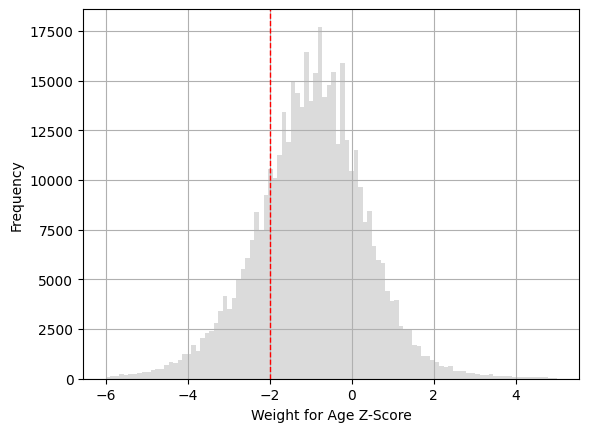

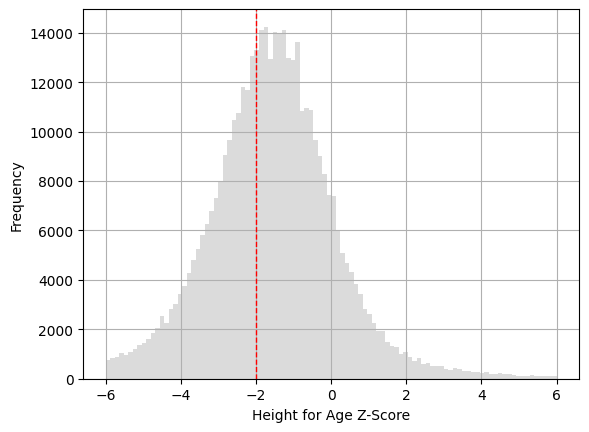

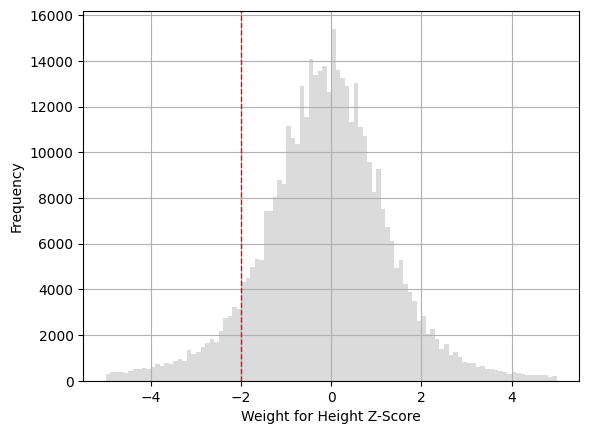

In [ ]:
for i in range(len(variables_anthro)):
    df = variables_anthro[i]
    col = values_z_score[i]
    til = titles[i]
    plt.figure()
    df[col].hist(bins=100, alpha=0.8, color="lightgray")
    plt.ylabel('Frequency', fontsize=10);
    plt.xlabel(til, fontsize=10);
    plt.axvline(-2, color='r', linestyle='dashed', linewidth=1)
    plt.show()



# **GRAPH TEMPERATURE**

Clean DHS, dropping values without t2m

In [ ]:
df_dhs_complete = df_dhs_complete.dropna(subset=['Monthly_Temperature']).reset_index()

getting mean of temperature by country

In [ ]:
mean_temp = df_dhs_complete.groupby('country')['Monthly_Temperature'].mean().reset_index()
mean_temp.head()


,country,Monthly_Temperature
0,albania,8.104944
1,angola,23.413765
2,armenia,4.196768
3,bangladesh,25.735891
4,benin,26.944633


In [ ]:
mean_temp.to_csv("/content/drive/MyDrive/MASTERS/Thesis_Python/mean_temp.csv",index=False)

merged mean temperature df and geometries from df_WB3

In [ ]:
merged_mean_temp_geo = mean_temp.merge(df_WB3, left_on='country', right_on='WB_NAME')
merged_mean_temp_geo = gpd.GeoDataFrame(merged_mean_temp_geo)
merged_mean_temp_geo.head()

,country,Monthly_Temperature,WB_NAME,ISO_A3,CONTINENT,REGION_WB,SUBREGION,REGION_UN,ECONOMY,geometry
0,albania,8.104944,albania,ALB,Europe,Europe & Central Asia,Southern Europe,Europe,6. Developing region,"POLYGON ((20.56715 41.87318, 20.54172 41.86158..."
1,angola,23.413765,angola,AGO,Africa,Sub-Saharan Africa,Middle Africa,Africa,7. Least developed region,"MULTIPOLYGON (((13.07370 -4.63532, 13.06533 -4..."
2,armenia,4.196768,armenia,ARM,Asia,Europe & Central Asia,Western Asia,Asia,6. Developing region,"MULTIPOLYGON (((45.00240 41.29045, 45.03940 41..."
3,bangladesh,25.735891,bangladesh,BGD,Asia,South Asia,Southern Asia,Asia,7. Least developed region,"MULTIPOLYGON (((92.57588 21.97757, 92.59024 21..."
4,benin,26.944633,benin,BEN,Africa,Sub-Saharan Africa,Western Africa,Africa,7. Least developed region,"POLYGON ((3.59640 11.69577, 3.57439 11.67304, ..."


In [ ]:
merged_mean_temp_geo['Monthly_Temperature'].max()

31.489136

getting countries where mean temperature in all the sample is above 25˚ and adding to the df the central point of geometry

In [ ]:
high_tem = merged_mean_temp_geo.loc[merged_mean_temp_geo["Monthly_Temperature"]> 25]
high_tem["centroid"] = high_tem["geometry"].centroid

high_tem= high_tem.sort_values(by=['Monthly_Temperature'], ascending=False)
high_tem.to_csv("/content/drive/MyDrive/MASTERS/Thesis_Python/.csv",index=False)

<ipython-input-24-7a27366e8f4f>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  high_tem["centroid"] = high_tem["geometry"].centroid
/usr/local/lib/python3.9/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,country,Monthly_Temperature,WB_NAME,ISO_A3,CONTINENT,REGION_WB,SUBREGION,REGION_UN,ECONOMY,geometry,centroid
39,niger,31.489136,niger,NER,Africa,Sub-Saharan Africa,Western Africa,Africa,7. Least developed region,"POLYGON ((3.59640 11.69577, 3.58937 11.70151, ...",POINT (9.38603 17.41846)
33,mali,28.489193,mali,MLI,Africa,Sub-Saharan Africa,Western Africa,Africa,7. Least developed region,"POLYGON ((-12.26413 14.77494, -12.24679 14.767...",POINT (-3.53908 17.34416)
50,togo,28.411615,togo,TGO,Africa,Sub-Saharan Africa,Western Africa,Africa,7. Least developed region,"POLYGON ((-0.16611 11.13498, -0.11506 11.12466...",POINT (0.96227 8.52679)
8,cambodia,27.682091,cambodia,KHM,Asia,East Asia & Pacific,South-Eastern Asia,Asia,7. Least developed region,"MULTIPOLYGON (((107.52039 14.70458, 107.53243 ...",POINT (104.90280 12.71556)
6,burkina_faso,27.241852,burkina_faso,BFA,Africa,Sub-Saharan Africa,Western Africa,Africa,7. Least developed region,"POLYGON ((2.39017 11.89654, 2.35410 11.79985, ...",POINT (-1.75553 12.26955)
40,nigeria,27.197624,nigeria,NGA,Africa,Sub-Saharan Africa,Western Africa,Africa,5. Emerging region: G20,"MULTIPOLYGON (((3.59640 11.69577, 3.64777 11.7...",POINT (8.09124 9.59531)
4,benin,26.944633,benin,BEN,Africa,Sub-Saharan Africa,Western Africa,Africa,7. Least developed region,"POLYGON ((3.59640 11.69577, 3.57439 11.67304, ...",POINT (2.32874 9.64122)
11,chad,26.606165,chad,TCD,Africa,Sub-Saharan Africa,Middle Africa,Africa,7. Least developed region,"POLYGON ((14.06491 13.07799, 13.83611 13.39104...",POINT (18.64625 15.33308)
20,ghana,26.313219,ghana,GHA,Africa,Sub-Saharan Africa,Western Africa,Africa,6. Developing region,"POLYGON ((-0.16611 11.13498, -0.15867 11.11844...",POINT (-1.21652 7.95395)
44,senegal,26.288786,senegal,SEN,Africa,Sub-Saharan Africa,Western Africa,Africa,7. Least developed region,"POLYGON ((-12.26413 14.77494, -12.25651 14.745...",POINT (-14.47131 14.36779)


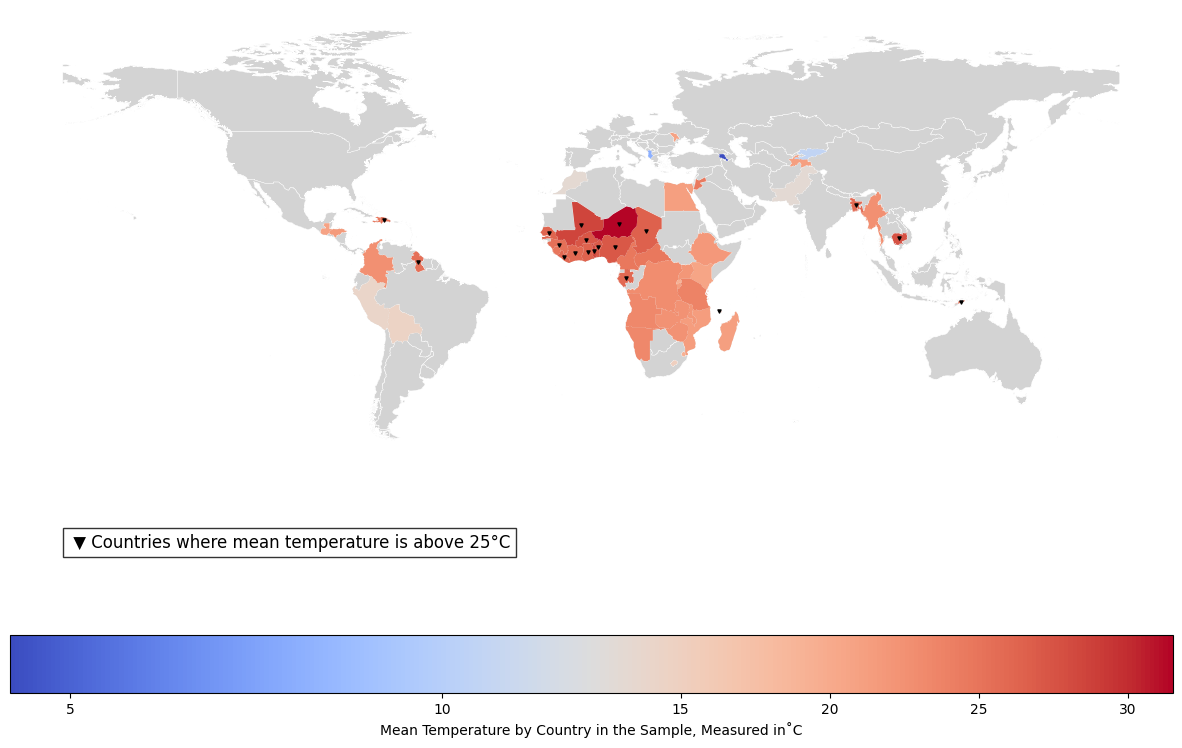

In [ ]:
districts_subset = df_WB3.cx[merged_mean_temp_geo.total_bounds[0]:merged_mean_temp_geo.total_bounds[2],merged_mean_temp_geo.total_bounds[1]:merged_mean_temp_geo.total_bounds[3]]

ax = districts_subset.plot(color='lightgray', edgecolor='white',linewidth=0.3,figsize=(15,15))

vmin, vmax, vcenter = merged_mean_temp_geo.Monthly_Temperature.min(), merged_mean_temp_geo.Monthly_Temperature.max(), 12
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

merged_mean_temp_geo.plot(column='Monthly_Temperature', ax=ax, norm=norm ,legend=True,cmap='coolwarm',figsize=(5,5),legend_kwds={'label': "Mean Temperature by Country in the Sample, Measured in˚C",'orientation': "horizontal"})
ax.set_axis_off()

high_tem["centroid"].plot(ax=ax, color="black", marker='v',markersize=5 )

plt.annotate(" \u25BC Countries where mean temperature is above 25°C", xy=(0.05, -0.2), xycoords='axes fraction', fontsize=12, ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# **GRAPH OUTCOMES**

In [ ]:
W_H_by_country = WH.groupby(['country'], as_index=False)['WHZ'].mean()
W_A_by_country = WA.groupby(['country'], as_index=False)['WAZ'].mean()
H_A_by_country = HA.groupby(['country'], as_index=False)['HAZ'].mean()


In [ ]:
waste = WH.loc[(WH['WHZ']<-2)]
under = WA.loc[(WA['WAZ']<-2)]
stunt = HA.loc[(HA['HAZ']<-2)]
waste_by_country = waste.groupby(['country'], as_index=False).count()
under_by_country = under.groupby(['country'], as_index=False).count()
stunt_by_country = stunt.groupby(['country'], as_index=False).count()
waste_by_country.head()

,country,index,WAZ,HAZ,child_who_bmi4age_z,WHZ,child_who_wght4hght_fl,child_who_hght4age_fl,child_who_wght4age_fl,child_who_bmi4age_fl,...,grid_date,_merge,WB_NAME,ISO_A3,CONTINENT,REGION_WB,SUBREGION,REGION_UN,ECONOMY,geometry
0,albania,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
1,angola,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
2,armenia,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
3,bangladesh,3483,3483,3483,3483,3483,3483,3483,3483,3483,...,3483,3483,3483,3483,3483,3483,3483,3483,3483,3483
4,benin,1520,1520,1520,1520,1520,1520,1520,1520,1520,...,1520,1520,1520,1520,1520,1520,1520,1520,1520,1520


In [ ]:
#print((waste.count()*100)/WH.count())
waste_by_country.sort_values(by='WHZ', ascending=False).head(5)


,country,index,WAZ,HAZ,child_who_bmi4age_z,WHZ,child_who_wght4hght_fl,child_who_hght4age_fl,child_who_wght4age_fl,child_who_bmi4age_fl,...,grid_cell,grid_date,_merge,WB_NAME,ISO_A3,CONTINENT,REGION_WB,SUBREGION,REGION_UN,ECONOMY
40,nigeria,5691,5691,5691,5691,5691,5691,5691,5691,5691,...,5691,5691,5691,5691,5691,5691,5691,5691,5691,5691
3,bangladesh,3483,3483,3483,3483,3483,3483,3483,3483,3483,...,3483,3483,3483,3483,3483,3483,3483,3483,3483,3483
33,mali,2785,2785,2785,2785,2785,2785,2785,2785,2785,...,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785
17,egypt,2619,2619,2619,2619,2619,2619,2619,2619,2619,...,2619,2619,2619,2619,2619,2619,2619,2619,2619,2619
6,burkina_faso,2373,2373,2373,2373,2373,2373,2373,2373,2373,...,2373,2373,2373,2373,2373,2373,2373,2373,2373,2373


In [ ]:
waste_by_country_geo = gpd.GeoDataFrame(waste_by_country.merge(df_WB3, left_on='country', right_on='WB_NAME'))
under_by_country_geo = gpd.GeoDataFrame(under_by_country.merge(df_WB3, left_on='country', right_on='WB_NAME'))
stunt_by_country_geo =gpd.GeoDataFrame(stunt_by_country.merge(df_WB3, left_on='country', right_on='WB_NAME'))
waste_by_country_geo=waste_by_country_geo.rename(columns={"geometry_y": "geometry"})
under_by_country_geo=under_by_country_geo.rename(columns={"geometry_y": "geometry"})
stunt_by_country_geo=stunt_by_country_geo.rename(columns={"geometry_y": "geometry"})
under_by_country_geo.head()

,country,index,WAZ,HAZ,child_who_bmi4age_z,WHZ,child_who_wght4hght_fl,child_who_hght4age_fl,child_who_wght4age_fl,child_who_bmi4age_fl,...,ECONOMY_x,geometry_x,WB_NAME_y,ISO_A3_y,CONTINENT_y,REGION_WB_y,SUBREGION_y,REGION_UN_y,ECONOMY_y,geometry
0,albania,8,8,8,8,7,7,8,8,8,...,8,8,albania,ALB,Europe,Europe & Central Asia,Southern Europe,Europe,6. Developing region,"POLYGON ((20.56715 41.87318, 20.54172 41.86158..."
1,angola,299,299,298,298,296,296,298,299,298,...,299,299,angola,AGO,Africa,Sub-Saharan Africa,Middle Africa,Africa,7. Least developed region,"MULTIPOLYGON (((13.07370 -4.63532, 13.06533 -4..."
2,armenia,39,39,38,38,38,38,38,39,38,...,39,39,armenia,ARM,Asia,Europe & Central Asia,Western Asia,Asia,6. Developing region,"MULTIPOLYGON (((45.00240 41.29045, 45.03940 41..."
3,bangladesh,9493,9493,9252,9252,9214,9214,9252,9493,9252,...,9493,9493,bangladesh,BGD,Asia,South Asia,Southern Asia,Asia,7. Least developed region,"MULTIPOLYGON (((92.57588 21.97757, 92.59024 21..."
4,benin,3213,3213,3187,3187,3153,3153,3187,3213,3187,...,3213,3213,benin,BEN,Africa,Sub-Saharan Africa,Western Africa,Africa,7. Least developed region,"POLYGON ((3.59640 11.69577, 3.57439 11.67304, ..."


In [ ]:
W_H_by_country_geo = gpd.GeoDataFrame(W_H_by_country.merge(df_WB3, left_on='country', right_on='WB_NAME'))
W_A_by_country_geo = gpd.GeoDataFrame(W_A_by_country.merge(df_WB3, left_on='country', right_on='WB_NAME'))
H_A_by_country_geo =gpd.GeoDataFrame(H_A_by_country.merge(df_WB3, left_on='country', right_on='WB_NAME'))


NameError: ignored

**Graph country weight by height**

<ipython-input-52-6096544a442a>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('plasma')


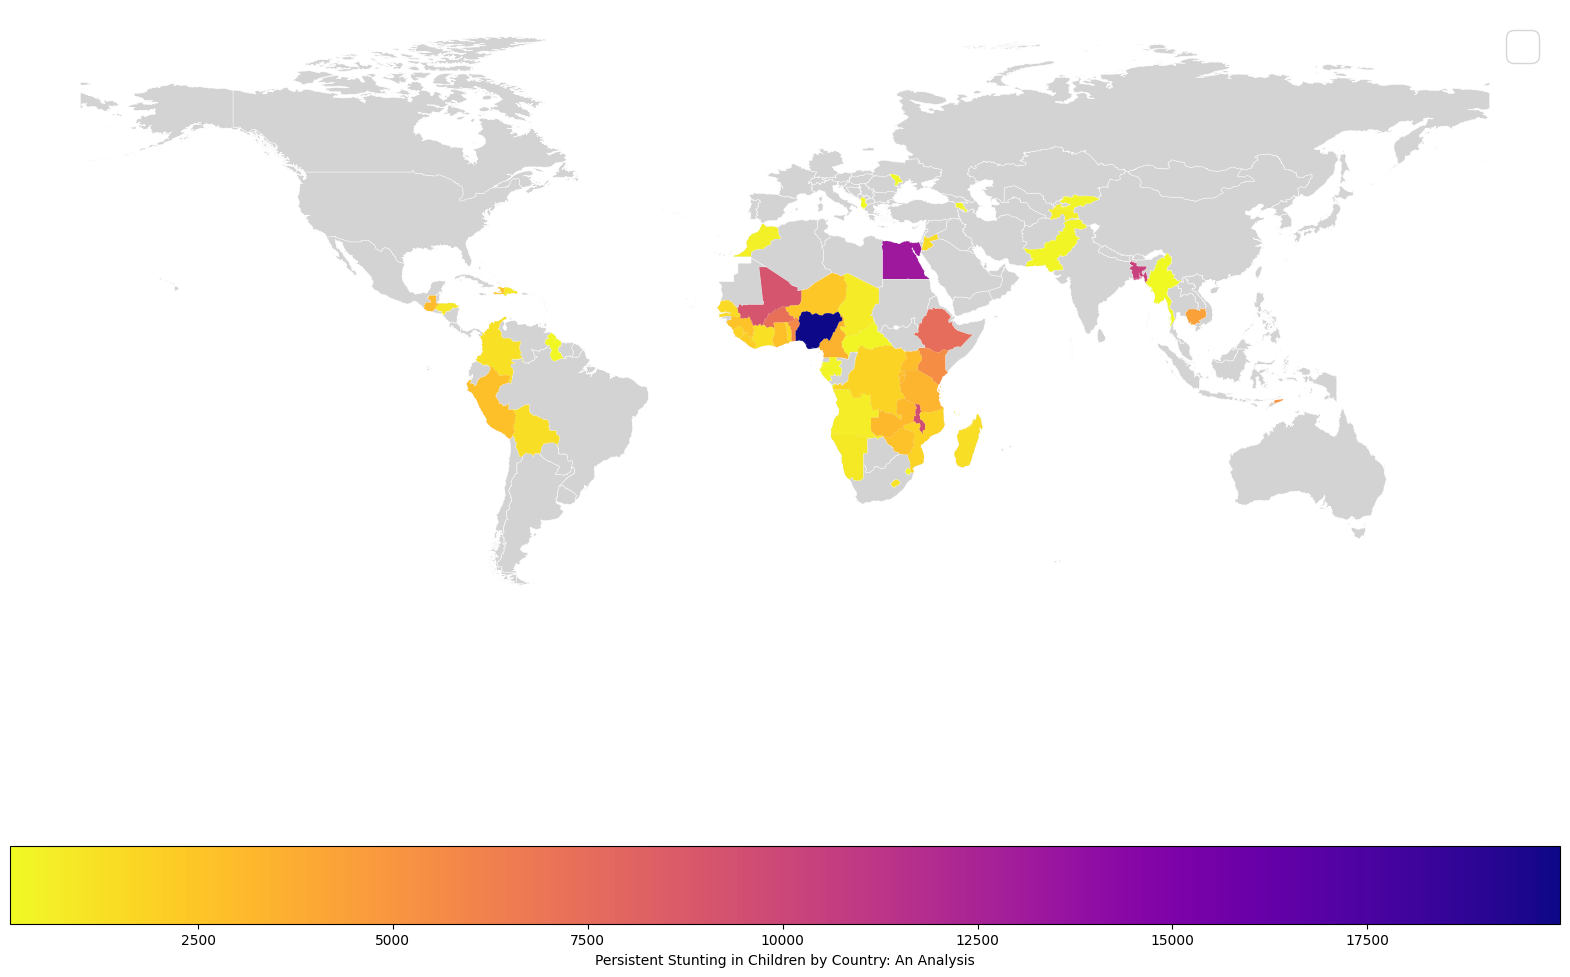

In [ ]:
districts_subset = df_WB3.cx[stunt_by_country_geo.total_bounds[0]:stunt_by_country_geo.total_bounds[2],stunt_by_country_geo.total_bounds[1]:stunt_by_country_geo.total_bounds[3]]

vmin, vmax, vcenter = stunt_by_country_geo.HAZ.min(), stunt_by_country_geo.HAZ.max(), (stunt_by_country_geo.HAZ.min()+ stunt_by_country_geo.HAZ.max())/2

norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

orig_map=plt.cm.get_cmap('plasma')

reversed_map = orig_map.reversed()
  # under = cividis
  # stunting = plasma
  # wasting = viridis
ax = districts_subset.plot(color='lightgray', edgecolor='white',linewidth=0.3,figsize=(20,20))

stunt_by_country_geo.plot(column='HAZ', ax=ax, legend=True,cmap= reversed_map , norm = norm, figsize=(10,10),legend_kwds={'label': "Persistent Stunting in Children by Country: An Analysis",'orientation': "horizontal"})
ax.legend(fontsize=30)
ax.set_axis_off()


**Graph country weight by age**

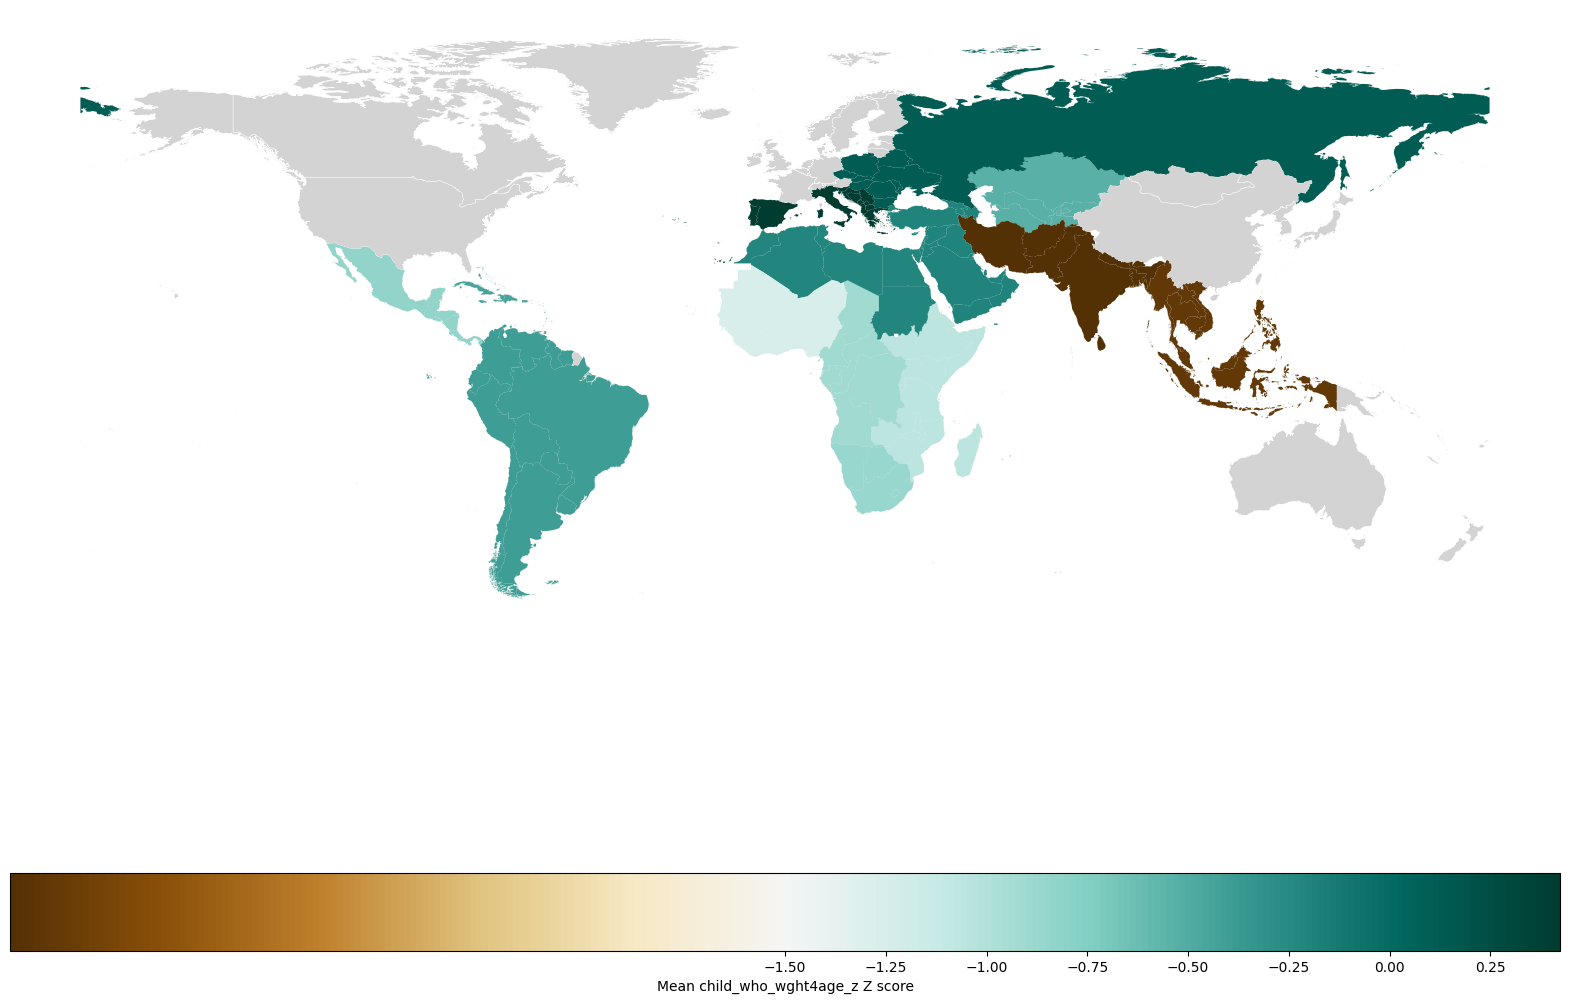

In [ ]:
districts_subset = df_WB3.cx[W_A_by_country_geo.total_bounds[0]:W_A_by_country_geo.total_bounds[2],W_A_by_country_geo.total_bounds[1]:W_A_by_country_geo.total_bounds[3]]

vmin, vmax, vcenter = W_A_by_country_geo.WAZ.min(), W_A_by_country_geo.WAZ.max(), -1.5
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

ax = districts_subset.plot(color='lightgray', edgecolor='white',linewidth=0.3,figsize=(20,20))

W_A_by_country_geo.plot(column='WAZ', ax=ax, legend=True,cmap='BrBG' , norm = norm, figsize=(10,10),legend_kwds={'label': "Mean child_who_wght4age_z Z score",'orientation': "horizontal"})
ax.set_axis_off()

**Graph country height by age**

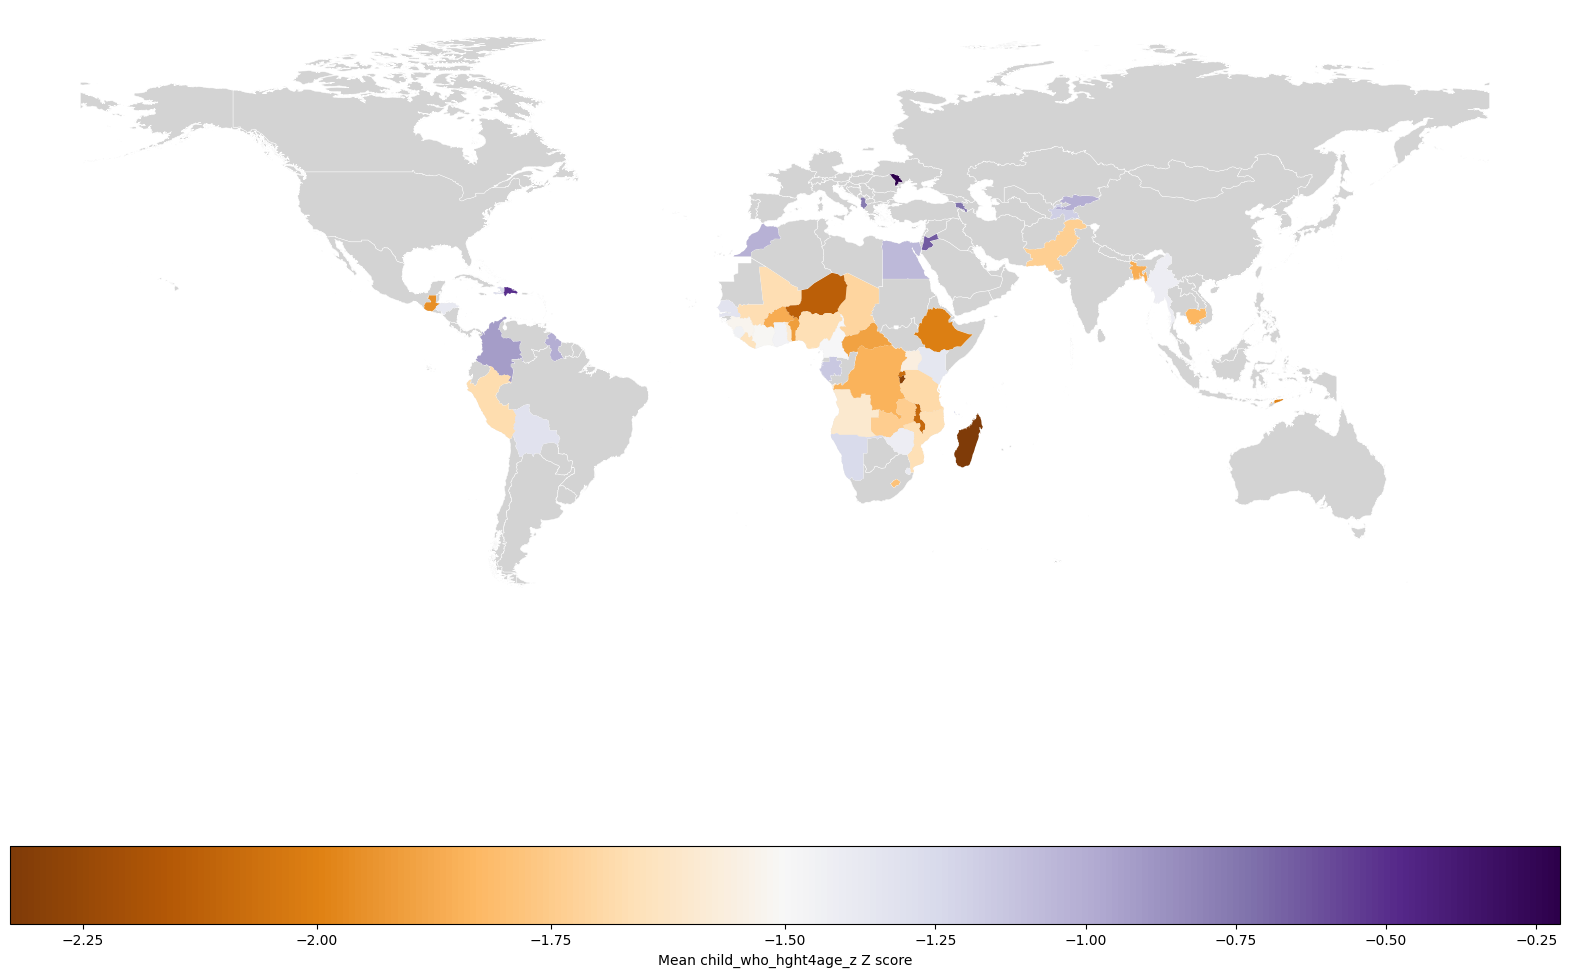

In [ ]:
districts_subset = df_WB3.cx[H_A_by_country_geo.total_bounds[0]:H_A_by_country_geo.total_bounds[2],H_A_by_country_geo.total_bounds[1]:H_A_by_country_geo.total_bounds[3]]

vmin, vmax, vcenter = H_A_by_country_geo.HAZ.min(), H_A_by_country_geo.HAZ.max(), -1.5
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

ax = districts_subset.plot(color='lightgray', edgecolor='white',linewidth=0.3,figsize=(20,20))

H_A_by_country_geo.plot(column='HAZ', ax=ax, legend=True,cmap='PuOr' , norm = norm, figsize=(10,10),legend_kwds={'label': "Mean child_who_hght4age_z Z score",'orientation': "horizontal"})
ax.set_axis_off()

# **subsaharan_countries**

In [ ]:
subsaharan_countries = ['angola','benin','burkina_faso','burundi','cameroon','central_african_republic','chad','comoros','congo_drc','cote_divoire','ethiopia','gabon','ghana','guinea','kenya','lesotho','liberia','madagascar','malawi','mali','mozambique','namibia','niger','nigeria','rwanda','senegal','sierra_leone','tanzania','togo','uganda','zambia','zimbabwe']

In [ ]:
df_subsaharan_countries=df_dhs_complete[df_dhs_complete['country']=='angola']
for country in subsaharan_countries[1:]:
  df_subsaharan_countries = df_subsaharan_countries.append(df_dhs_complete[df_dhs_complete['country'] == country])

In [ ]:
df_subsaharan_countries.info()

In [ ]:
def flag_df(df_subsaharan_countries):
    if (df_subsaharan_countries['child_who_wght4hght_fl'] == 0 and df_subsaharan_countries['child_age_mnths'] < 13):
        return df_subsaharan_countries['child_who_wght4hght_z']
    else:
        return np.nan
df_subsaharan_countries['underweightA'] = df_subsaharan_countries.apply(flag_df, axis = 1)

In [ ]:
df_subsaharan_countries.underweightA.mean()

-0.6270108162407139

In [ ]:
malnutririonA = df_subsaharan_countries[(df_subsaharan_countries['child_who_wght4hght_fl']==0)&(df_subsaharan_countries['child_age_mnths']<13)]
underweightA = df_subsaharan_countries[(df_subsaharan_countries['child_who_wght4age_fl']==0)&(df_subsaharan_countries['child_age_mnths']<13)]
stuntingA = df_subsaharan_countries[(df_subsaharan_countries['child_who_hght4age_fl']==0)&(df_subsaharan_countries['child_age_mnths']<13)]

Ai,r,c,m,y = νTi,m=0 + βf (Ti,y) + γ Xi + ωc,y + δr + μm + ǫi,c,y

graph year temperature in one country angola

In [ ]:
df_subsaharan_countries_temp = df_subsaharan_countries.groupby(['interview_year'], as_index=False)['t2m'].mean()
df_subsaharan_countries_temp


,interview_year,t2m
0,1988,25.036345
1,1990,25.544569
2,1991,24.240421
3,1992,31.487240
4,1993,25.904776
5,1994,24.818283
6,1996,27.326723
7,1997,21.147114
8,1998,29.812603
9,1999,24.238974


In [ ]:
df_subsaharan_countries.loc

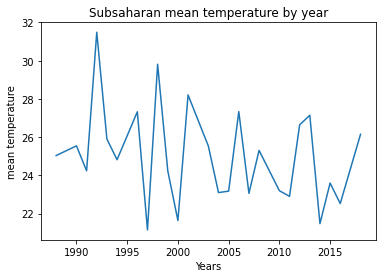

In [ ]:
x =df_subsaharan_countries_temp.interview_year
y=df_subsaharan_countries_temp.t2m

plt.plot(x, y)
plt.title('Subsaharan mean temperature by year')
plt.xlabel('Years')
plt.ylabel('mean temperature')
plt.show()

In [ ]:
df_subsaharan_countries_temp.drop(df_subsaharan_countries_temp[df_subsaharan_countries_temp['interview_year'] == 2009].index, inplace = True)

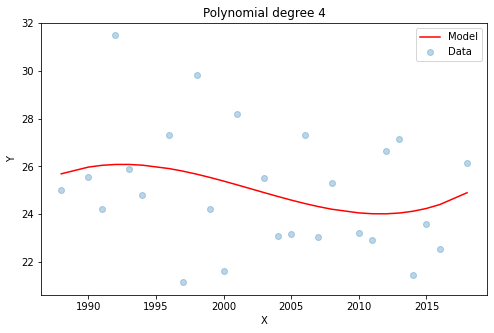

(<matplotlib.legend.Legend at 0x7f3b497ec400>, None)

In [ ]:
model_1 = make_pipeline(PolynomialFeatures(degree = 7),LinearRegression())
model_1.fit(x.values.reshape(-1,1),y)
plt.figure(figsize = (8,5))
plt.scatter(x,y, alpha = .3, label = 'Data')
plt.plot(x,model_1.predict(x.values.reshape(-1,1)), color = 'red', label = 'Model')
plt.title('Polynomial degree 4')
plt.xlabel('X'), plt.ylabel('Y')
plt.legend(), plt.show()

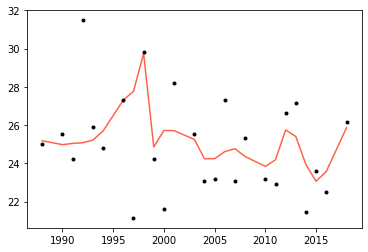

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
sm_x, sm_y = sm_lowess(y, x,  frac=1./5.,
                           it=5, return_sorted = True).T
plt.plot(sm_x, sm_y, color='tomato')
plt.plot(x, y, 'k.')

In [ ]:
x = underweightA.t2m
y = underweightA.child_who_wght4age_z
d = { "x": pd.Series(x), "y": pd.Series(y)}
df = pd.DataFrame(d)
mod = smf.ols('y ~ x', data=df)
res = mod.fit()
print(res.summary())

beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('myreg.tex', 'w')
f.write(beginningtex)
f.write(res.summary().as_latex())
f.write(endtex)
f.close()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1244.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          8.77e-271
Time:                        22:43:34   Log-Likelihood:            -1.6955e+05
No. Observations:               91317   AIC:                         3.391e+05
Df Residuals:                   91315   BIC:                         3.391e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4204      0.032     13.278      0.0

In [ ]:
pip install --upgrade statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from statsmodels.iolib.summary2 import add_significance_stars

model1 = sm.OLS(y, x1).fit()

# Crear la tabla de resultados
results_table = summary_col([model1], model_names=['Modelo 1'], float_format='%0.4f')

# Agregar información de significancia estadística
results_table.add_significance_stars([0.05, 0.01, 0.001])

# Imprimir la tabla de resultados
print(results_table)

ImportError: ignored

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


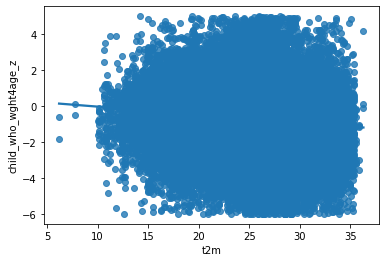

In [ ]:
import seaborn as sns
sns.regplot(x, y)

# **Loading files of regressions country temp**


In [ ]:
Country_W_A = pd.read_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/Country_W-A_CON_MOM_FE_M.csv', header=1)
Country_H_A = pd.read_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/Country_H-A_CON_MOM_FE_M.csv', header=1)
Country_W_H = pd.read_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/Country_W-H_CON_MOM_FE_M.csv', header=1)

number_rows = [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]
Country_W_A = Country_W_A.drop(number_rows)
Country_H_A = Country_H_A.drop(number_rows)
Country_W_H = Country_W_H.drop(number_rows)

Country_W_A

,VARIABLES,albania,angola,armenia,bangladesh,benin,bolivia,burkina_faso,burundi,cambodia,...,senegal,sierra_leone,swaziland,tajikistan,tanzania,timor_leste,togo,uganda,zambia,zimbabwe
1,Monthly_Temperature,0.0102,0.0147,-0.0441,0.000195,-0.0275,0.0122*,-0.0361*,-0.00563,-0.0122,...,-0.0406***,-0.0959,0.0222,0.0255,0.0105,-0.00881,0.0494,0.0522***,-0.0288**,0.00874


change columns to rows

In [ ]:
#melted_Country_W_A = pd.melt(Country_W_A, id_vars=["VARIABLES"], var_name='Country', value_name='Coefficient')
#melted_Country_H_A = pd.melt(Country_H_A, id_vars=["VARIABLES"], var_name='Country', value_name='Coefficient')
#melted_Country_W_H = pd.melt(Country_W_H, id_vars=["VARIABLES"], var_name='Country', value_name='Coefficient')

change columns to rows more than 1 variable

In [ ]:
melted_Country_W_A = Country_W_A.T
melted_Country_H_A = Country_H_A.T
melted_Country_W_H = Country_W_H.T
# Asignar la primera fila como la cabecera
melted_Country_W_A = melted_Country_W_A.set_axis(melted_Country_W_A.iloc[0], axis=1)
melted_Country_H_A = melted_Country_H_A.set_axis(melted_Country_H_A.iloc[0], axis=1)
melted_Country_W_H = melted_Country_W_H.set_axis(melted_Country_W_H.iloc[0], axis=1)
# Resetear el índice
melted_Country_W_A = melted_Country_W_A.reset_index()
melted_Country_H_A = melted_Country_H_A.reset_index()
melted_Country_W_H = melted_Country_W_H.reset_index()
# Renombrar la columna del índice
melted_Country_W_A = melted_Country_W_A.rename(columns={'index': 'Country'})
melted_Country_H_A = melted_Country_H_A.rename(columns={'index': 'Country'})
melted_Country_W_H = melted_Country_W_H.rename(columns={'index': 'Country'})
# remove 1st row
melted_Country_W_A = melted_Country_W_A.drop(index=0)
melted_Country_H_A = melted_Country_H_A.drop(index=0)
melted_Country_W_H = melted_Country_W_H.drop(index=0)
# Mostrar el dataframe resultante
melted_Country_W_A=melted_Country_W_A.merge(df_WB3, left_on='Country', right_on='WB_NAME')
melted_Country_H_A=melted_Country_H_A.merge(df_WB3, left_on='Country', right_on='WB_NAME')
melted_Country_W_H=melted_Country_W_H.merge(df_WB3, left_on='Country', right_on='WB_NAME')


['Country',
 'Monthly_Temperature',
 'WB_NAME',
 'ISO_A3',
 'geometry',
 'CONTINENT',
 'REGION_WB',
 'SUBREGION',
 'REGION_UN',
 'ECONOMY']

In [ ]:
melted_Country_W_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 1 to 54
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               54 non-null     object
 1   Monthly Temperature   54 non-null     object
dtypes: object(2)
memory usage: 996.0+ bytes


separate values from one independent variable

In [ ]:
column_names = melted_Country_H_A.columns.tolist()

melted_Country_W_A[column_names[0]] = melted_Country_W_A[column_names[0]].str.capitalize()
melted_Country_H_A[column_names[0]] = melted_Country_H_A[column_names[0]].str.capitalize()
melted_Country_W_H[column_names[0]] = melted_Country_W_H[column_names[0]].str.capitalize()


melted_Country_W_A['Sig_Count_temp'] = melted_Country_W_A[column_names[1]].str.count('\*')
melted_Country_H_A['Sig_Count_temp'] = melted_Country_H_A[column_names[1]].str.count('\*')
melted_Country_W_H['Sig_Count_temp'] = melted_Country_W_H[column_names[1]].str.count('\*')

#melted_Country_W_A['Sig_Count_Alt'] = melted_Country_W_A[column_names[2]].str.count('\*')
#melted_Country_H_A['Sig_Count_Alt'] = melted_Country_H_A[column_names[2]].str.count('\*')
#melted_Country_W_H['Sig_Count_Alt'] = melted_Country_W_H[column_names[2]].str.count('\*')


melted_Country_W_A['Month_Temp'] = melted_Country_W_A[column_names[1]].str.replace('*', '').astype(float)
melted_Country_H_A['Month_Temp'] = melted_Country_H_A[column_names[1]].str.replace('*', '').astype(float)
melted_Country_W_H['Month_Temp'] = melted_Country_W_H[column_names[1]].str.replace('*', '').astype(float)

#melted_Country_W_A['Alt_DEM'] = melted_Country_W_A[column_names[2]].str.replace('*', '').astype(float)
#melted_Country_H_A['Alt_DEM'] = melted_Country_H_A[column_names[2]].str.replace('*', '').astype(float)
#melted_Country_W_H['Alt_DEM'] = melted_Country_W_H[column_names[2]].str.replace('*', '').astype(float)

color_dict = {0: '#01b8aa', 1: '#97d65c', 2: '#ebac60', 3: '#de5959'}
#colors = {0: 'darkgreen', 1: 'limegreen', 2: 'lightgreen', 3: 'grey'}
#melted_Country_W_A['Color'] = melted_Country_H_A['Sig_Count_temp'].map(colors)
melted_Country_W_A['color'] = melted_Country_W_A['Sig_Count_temp'].map(color_dict)
melted_Country_H_A['color'] = melted_Country_H_A['Sig_Count_temp'].map(color_dict)
melted_Country_W_H['color'] = melted_Country_W_H['Sig_Count_temp'].map(color_dict)
#melted_Country_W_A['color2'] = melted_Country_W_A['Sig_Count_Alt'].map(color_dict)
#melted_Country_H_A['color2'] = melted_Country_H_A['Sig_Count_Alt'].map(color_dict)
#melted_Country_W_H['color2'] = melted_Country_W_H['Sig_Count_Alt'].map(color_dict)


melted_Country_W_A.head()


<ipython-input-66-5d73fed117e7>:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  melted_Country_W_A['Month_Temp'] = melted_Country_W_A[column_names[1]].str.replace('*', '').astype(float)
<ipython-input-66-5d73fed117e7>:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  melted_Country_H_A['Month_Temp'] = melted_Country_H_A[column_names[1]].str.replace('*', '').astype(float)
<ipython-input-66-5d73fed117e7>:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  melted_Country_W_H['Month_Temp'] = melted_Country_W_H[column_names[1

,Country,Monthly_Temperature,WB_NAME,ISO_A3,geometry,CONTINENT,REGION_WB,SUBREGION,REGION_UN,ECONOMY,Sig_Count_temp,Month_Temp,color
0,Albania,0.0102,albania,ALB,"POLYGON ((20.56715 41.87318, 20.54172 41.86158...",Europe,Europe & Central Asia,Southern Europe,Europe,6. Developing region,0,0.010200,#01b8aa
1,Angola,0.0147,angola,AGO,"MULTIPOLYGON (((13.07370 -4.63532, 13.06533 -4...",Africa,Sub-Saharan Africa,Middle Africa,Africa,7. Least developed region,0,0.014700,#01b8aa
2,Armenia,-0.0441,armenia,ARM,"MULTIPOLYGON (((45.00240 41.29045, 45.03940 41...",Asia,Europe & Central Asia,Western Asia,Asia,6. Developing region,0,-0.044100,#01b8aa
3,Bangladesh,0.000195,bangladesh,BGD,"MULTIPOLYGON (((92.57588 21.97757, 92.59024 21...",Asia,South Asia,Southern Asia,Asia,7. Least developed region,0,0.000195,#01b8aa
4,Benin,-0.0275,benin,BEN,"POLYGON ((3.59640 11.69577, 3.57439 11.67304, ...",Africa,Sub-Saharan Africa,Western Africa,Africa,7. Least developed region,0,-0.027500,#01b8aa


Saved  by country NO FE FULL SAMPLE

In [ ]:
#melted_Country_W_A.to_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/WAZ_Dta_1.csv', index=False)
#melted_Country_H_A.to_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/HAZ_Dta_1.csv', index=False)
#melted_Country_W_H.to_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/WHZ_Dta_1.csv', index=False)

Saved  by country FE YEAR AND ADM

In [ ]:
#melted_Country_W_A.to_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/WAZ_Dta_2.csv', index=False)
#melted_Country_H_A.to_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/HAZ_Dta_2.csv', index=False)
#melted_Country_W_H.to_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/WHZ_Dta_2.csv', index=False)

Saved by country FE YEAR MONTH AND ADM

In [ ]:
#melted_Country_W_A.to_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/WAZ_Dta_3.csv', index=False)
#melted_Country_H_A.to_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/HAZ_Dta_3.csv', index=False)
#melted_Country_W_H.to_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/WHZ_Dta_3.csv', index=False)

Save by country + ALT_DEM

In [ ]:
#melted_Country_W_A.to_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/WAZ_Dta_4.csv', index=False)
#melted_Country_H_A.to_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/HAZ_Dta_4.csv', index=False)
#melted_Country_W_H.to_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/WHZ_Dta_4.csv', index=False)

Save by country + ALT_DEM + FE YEAR AND ADM

In [ ]:
#melted_Country_W_A.to_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/WAZ_Dta_5.csv', index=False)
#melted_Country_H_A.to_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/HAZ_Dta_5.csv', index=False)
#melted_Country_W_H.to_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/WHZ_Dta_5.csv', index=False)


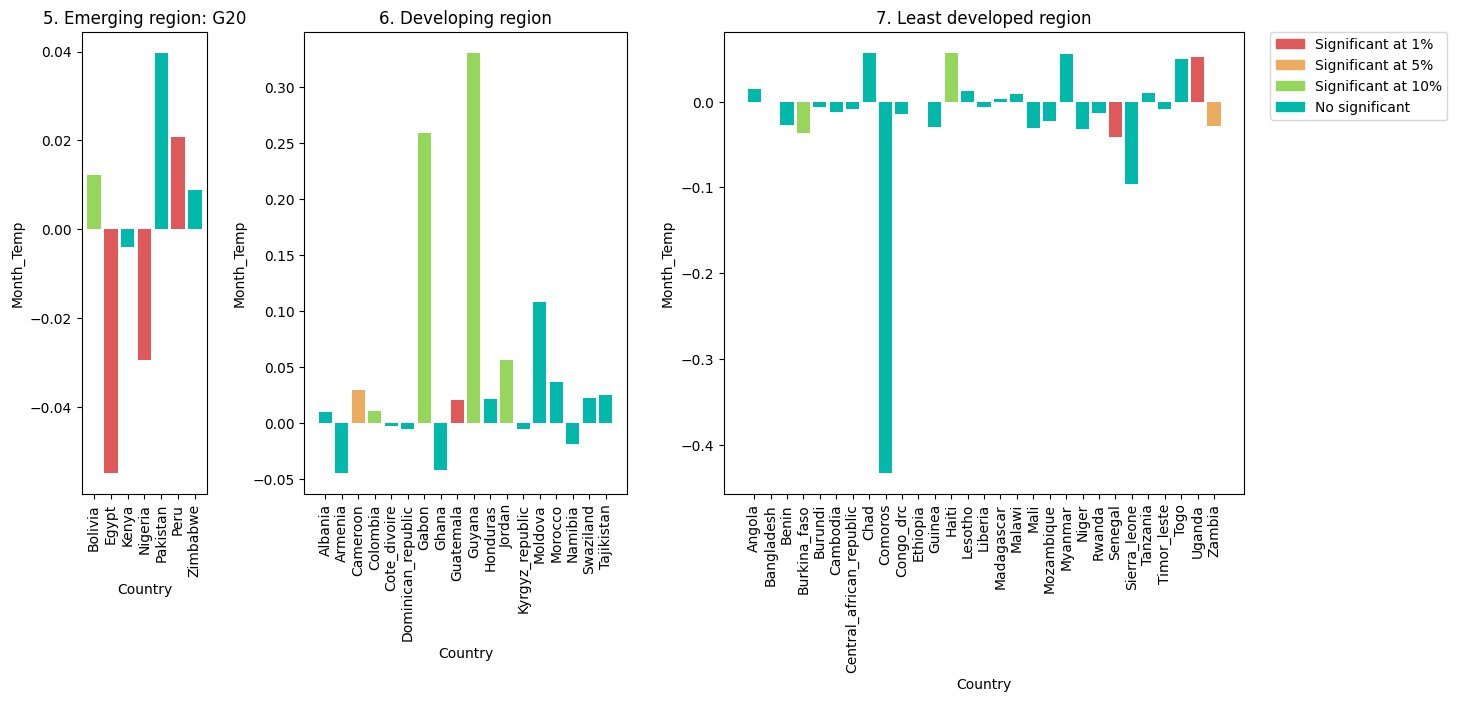

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by continent
grouped = melted_Country_W_A.groupby('ECONOMY')

# Count the number of countries in each continent
num_countries = grouped['Country'].nunique()

# Calculate the total width of the figure based on the number of subplots
total_width = 5 * len(grouped)

# Calculate the width ratio of each subplot based on the number of countries in each continent
width_ratios = num_countries / num_countries.sum()

# Create a figure object with subplots
fig, axs = plt.subplots(ncols=len(grouped), figsize=(total_width, 6), gridspec_kw={'width_ratios': width_ratios})
fig.subplots_adjust(wspace=0.3, hspace=0.3)

# Loop over the groups and plot the bars
for i, (name, group) in enumerate(grouped):
    axs[i].bar(group['Country'], group['Month_Temp'], color=group['color'])
    axs[i].set_xlabel('Country')
    axs[i].set_ylabel('Month_Temp')
    axs[i].set_title(name)  # Add continent name as title to subplot
    axs[i].tick_params(axis='x', labelrotation=90)

# Add legend to the last subplot
NS = mpatches.Patch(color='#01b8aa', label='No significant')
S5 = mpatches.Patch(color='#ebac60', label='Significant at 5%')
S10 = mpatches.Patch(color='#97d65c', label='Significant at 10%')
S1 = mpatches.Patch(color='#de5959', label='Significant at 1%')
legend = plt.legend(handles=[S1, S5, S10, NS], loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Adjust the plot layout to make room for the legend
# Show the plot
plt.show()


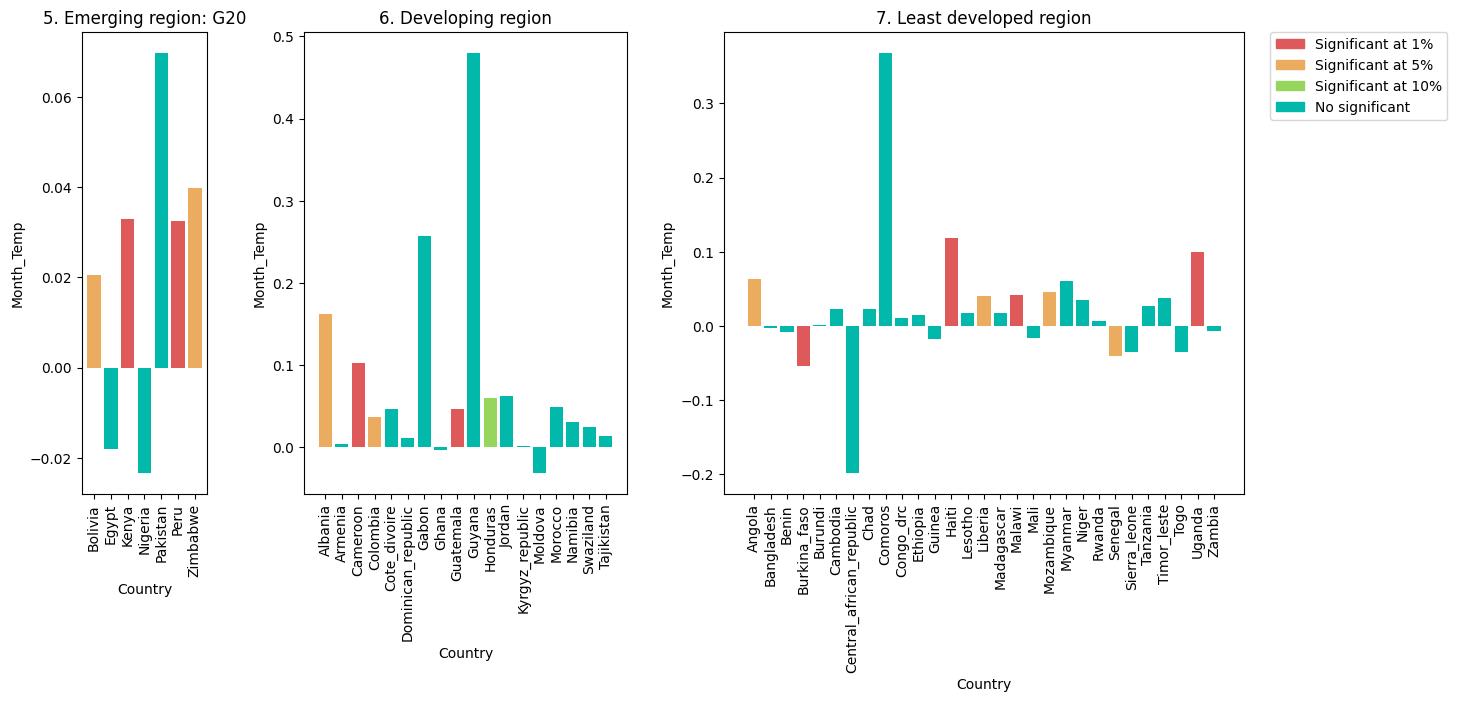

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by continent
grouped = melted_Country_H_A.groupby('ECONOMY')

# Count the number of countries in each continent
num_countries = grouped['Country'].nunique()

# Calculate the total width of the figure based on the number of subplots
total_width = 5 * len(grouped)

# Calculate the width ratio of each subplot based on the number of countries in each continent
width_ratios = num_countries / num_countries.sum()

# Create a figure object with subplots
fig, axs = plt.subplots(ncols=len(grouped), figsize=(total_width, 6), gridspec_kw={'width_ratios': width_ratios})
fig.subplots_adjust(wspace=0.3, hspace=0.3)

# Loop over the groups and plot the bars
for i, (name, group) in enumerate(grouped):
    axs[i].bar(group['Country'], group['Month_Temp'], color=group['color'])
    axs[i].set_xlabel('Country')
    axs[i].set_ylabel('Month_Temp')
    axs[i].set_title(name)  # Add continent name as title to subplot
    axs[i].tick_params(axis='x', labelrotation=90)

# Add legend to the last subplot
NS = mpatches.Patch(color='#01b8aa', label='No significant')
S5 = mpatches.Patch(color='#ebac60', label='Significant at 5%')
S10 = mpatches.Patch(color='#97d65c', label='Significant at 10%')
S1 = mpatches.Patch(color='#de5959', label='Significant at 1%')
legend = plt.legend(handles=[S1, S5, S10, NS], loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Adjust the plot layout to make room for the legend
# Show the plot
plt.show()

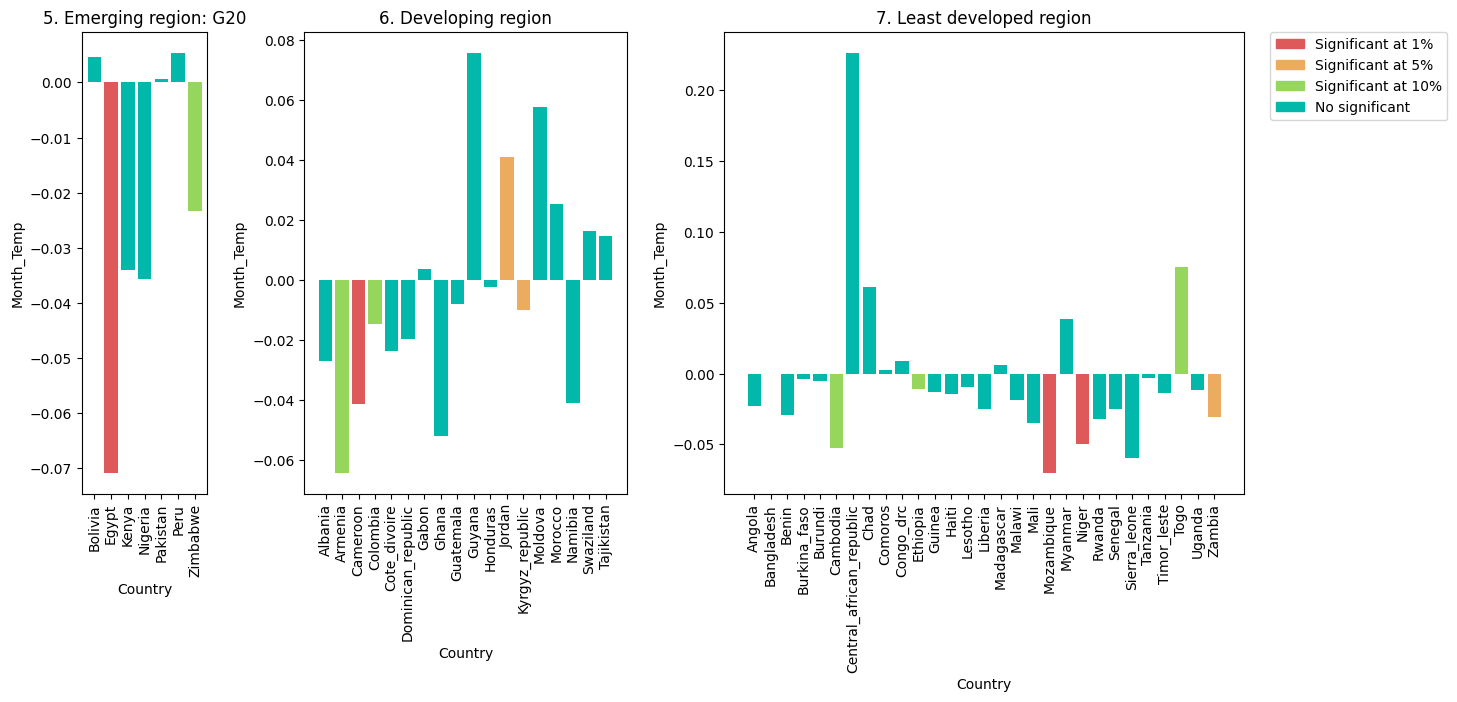

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by continent
grouped = melted_Country_W_H.groupby('ECONOMY')

# Count the number of countries in each continent
num_countries = grouped['Country'].nunique()

# Calculate the total width of the figure based on the number of subplots
total_width = 5 * len(grouped)

# Calculate the width ratio of each subplot based on the number of countries in each continent
width_ratios = num_countries / num_countries.sum()

# Create a figure object with subplots
fig, axs = plt.subplots(ncols=len(grouped), figsize=(total_width, 6), gridspec_kw={'width_ratios': width_ratios})
fig.subplots_adjust(wspace=0.3, hspace=0.3)

# Loop over the groups and plot the bars
for i, (name, group) in enumerate(grouped):
    axs[i].bar(group['Country'], group['Month_Temp'], color=group['color'])
    axs[i].set_xlabel('Country')
    axs[i].set_ylabel('Month_Temp')
    axs[i].set_title(name)  # Add continent name as title to subplot
    axs[i].tick_params(axis='x', labelrotation=90)

# Add legend to the last subplot
NS = mpatches.Patch(color='#01b8aa', label='No significant')
S5 = mpatches.Patch(color='#ebac60', label='Significant at 5%')
S10 = mpatches.Patch(color='#97d65c', label='Significant at 10%')
S1 = mpatches.Patch(color='#de5959', label='Significant at 1%')
legend = plt.legend(handles=[S1, S5, S10, NS], loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Adjust the plot layout to make room for the legend
# Show the plot
plt.show()

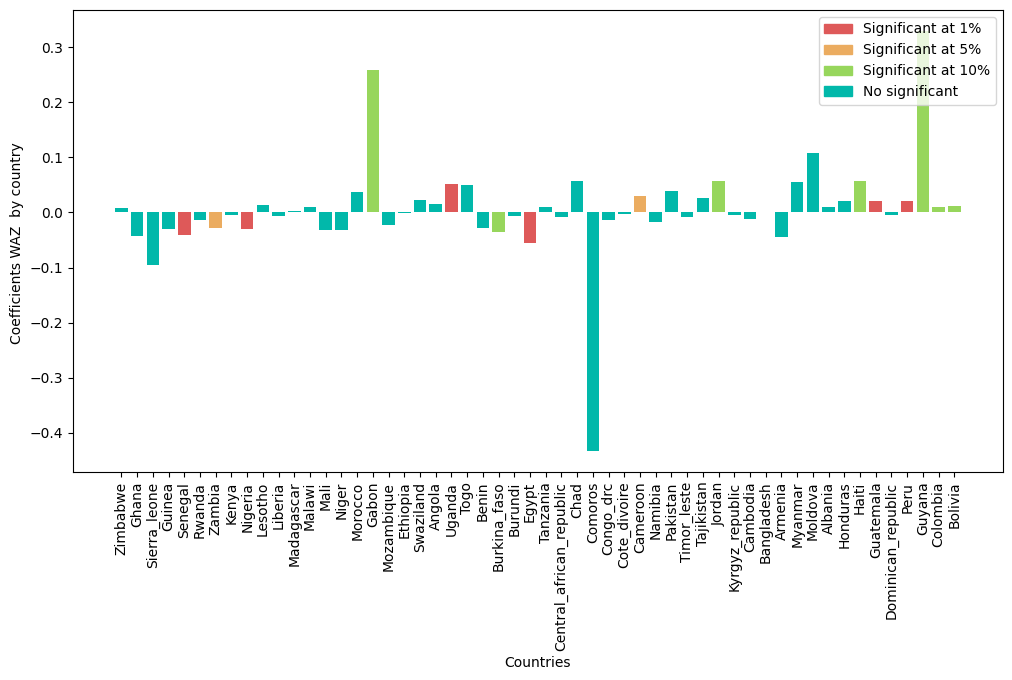

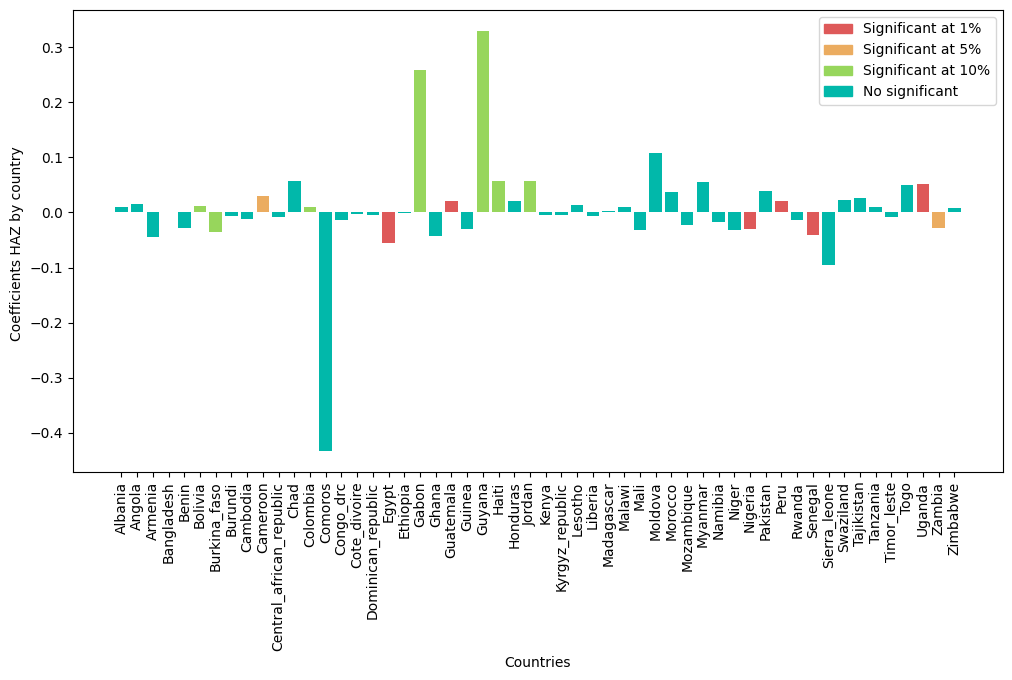

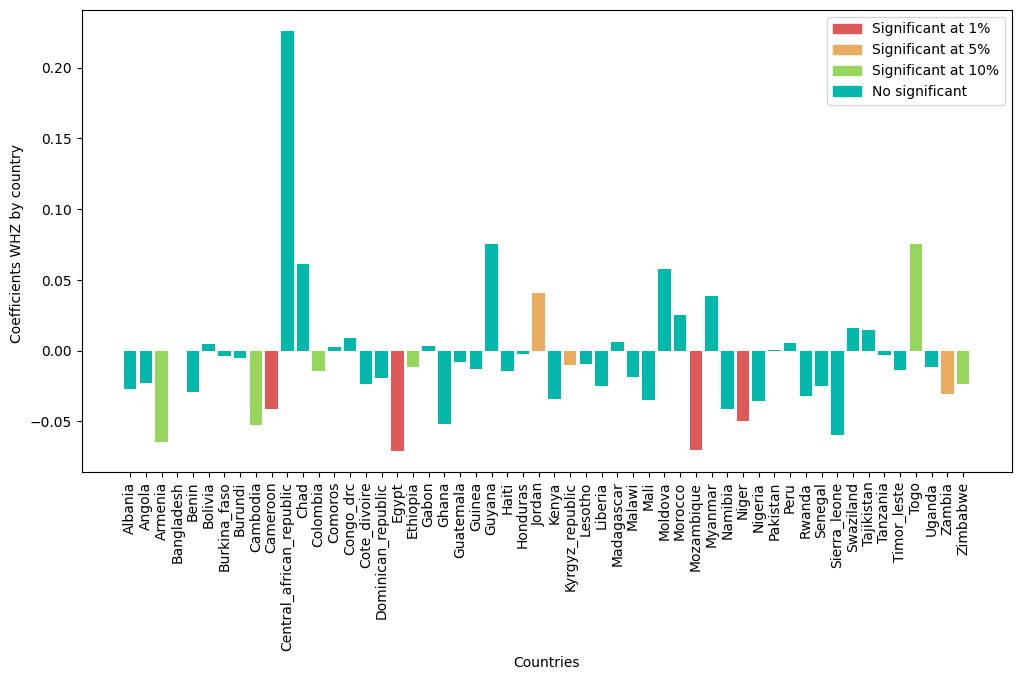

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import seaborn as sns

fig1, ax1 = plt.subplots(figsize=(12, 6))
bar= plt.bar(melted_Country_W_A.Country, melted_Country_W_A.Month_Temp, color=melted_Country_W_A.color)
NS = mpatches.Patch(color='#01b8aa', label='No significant')
S5 = mpatches.Patch(color='#ebac60', label='Significant at 5%')
S10 = mpatches.Patch(color='#97d65c', label='Significant at 10%')
S1 = mpatches.Patch(color='#de5959', label='Significant at 1%')

plt.legend(handles=[S1,S5,S10,NS], loc=1)

plt.xticks(rotation=90)

plt.xlabel('Countries')

plt.ylabel('Coefficients WAZ  by country ')



#handles = [plt.Rectangle((0,0),1,1, color=merged__GEO_Country_W_A[merged__GEO_Country_W_A['Sig_Count_temp']==label]['color'].iloc[0]) for label in leg_labels]

plt.show()

fig1, ax1 = plt.subplots(figsize=(12, 6))
bar= plt.bar(melted_Country_H_A.Country, melted_Country_H_A.Month_Temp, color=melted_Country_H_A.color)
NS = mpatches.Patch(color='#01b8aa', label='No significant')
S5 = mpatches.Patch(color='#ebac60', label='Significant at 5%')
S10 = mpatches.Patch(color='#97d65c', label='Significant at 10%')
S1 = mpatches.Patch(color='#de5959', label='Significant at 1%')

plt.legend(handles=[S1,S5,S10,NS], loc=1)

plt.xticks(rotation=90)


plt.xlabel('Countries')

plt.ylabel('Coefficients HAZ by country ')

#handles = [plt.Rectangle((0,0),1,1, color=merged__GEO_Country_W_A[merged__GEO_Country_W_A['Sig_Count_temp']==label]['color'].iloc[0]) for label in leg_labels]

plt.show()

fig1, ax1 = plt.subplots(figsize=(12, 6))
bar= plt.bar(melted_Country_W_H.Country, melted_Country_W_H.Month_Temp, color=melted_Country_W_H.color)
NS = mpatches.Patch(color='#01b8aa', label='No significant')
S5 = mpatches.Patch(color='#ebac60', label='Significant at 5%')
S10 = mpatches.Patch(color='#97d65c', label='Significant at 10%')
S1 = mpatches.Patch(color='#de5959', label='Significant at 1%')

plt.legend(handles=[S1,S5,S10,NS], loc=1)


plt.xlabel('Countries')

plt.ylabel('Coefficients WHZ by country ')
plt.xticks(rotation=90)


#handles = [plt.Rectangle((0,0),1,1, color=merged__GEO_Country_W_A[merged__GEO_Country_W_A['Sig_Count_temp']==label]['color'].iloc[0]) for label in leg_labels]

plt.show()

# **merge  with geometry**

In [ ]:
merged__GEO_Country_W_A = melted_Country_W_A.merge(df_WB3, left_on='Country', right_on='WB_NAME')
merged__GEO_Country_H_A = melted_Country_H_A.merge(df_WB3, left_on='Country', right_on='WB_NAME')
merged__GEO_Country_W_H = melted_Country_W_H.merge(df_WB3, left_on='Country', right_on='WB_NAME')

merged__GEO_Country_W_A['Month_Temp'] = merged__GEO_Country_W_A['Month_Temp'].astype(float)
merged__GEO_Country_H_A['Month_Temp'] = merged__GEO_Country_H_A['Month_Temp'].astype(float)
merged__GEO_Country_W_H['Month_Temp'] = merged__GEO_Country_W_H['Month_Temp'].astype(float)

color_dict = {0: 'blue', 1: 'yellow', 2: 'palegreen', 3: 'darkgreen'}
merged__GEO_Country_W_A['color'] = merged__GEO_Country_W_A['Sig_Count_temp'].map(color_dict)
merged__GEO_Country_H_A['color'] = merged__GEO_Country_H_A['Sig_Count_temp'].map(color_dict)
merged__GEO_Country_W_H['color'] = merged__GEO_Country_W_H['Sig_Count_temp'].map(color_dict)

merged__GEO_Country_W_A = gpd.GeoDataFrame(merged__GEO_Country_W_A)
merged__GEO_Country_H_A = gpd.GeoDataFrame(merged__GEO_Country_H_A)
merged__GEO_Country_W_H = gpd.GeoDataFrame(merged__GEO_Country_H_A)

merged__GEO_Country_W_A_copy=merged__GEO_Country_W_A[['geometry','Sig_Count_temp','color']]
merged__GEO_Country_H_A_copy=merged__GEO_Country_H_A[['geometry','Sig_Count_temp','color']]
merged__GEO_Country_W_H_copy=merged__GEO_Country_W_H[['geometry','Sig_Count_temp','color']]

merged__GEO_Country_W_A_copy['geometry'] = merged__GEO_Country_W_A_copy['geometry'].centroid
merged__GEO_Country_H_A_copy['geometry'] = merged__GEO_Country_H_A_copy['geometry'].centroid
merged__GEO_Country_W_H_copy['geometry'] = merged__GEO_Country_W_H_copy['geometry'].centroid
merged__GEO_Country_W_A_copy['Sig_Count_temp'] = merged__GEO_Country_W_A_copy['Sig_Count_temp']*10
merged__GEO_Country_H_A_copy['Sig_Count_temp'] = merged__GEO_Country_H_A_copy['Sig_Count_temp']*10
merged__GEO_Country_W_H_copy['Sig_Count_temp'] = merged__GEO_Country_W_H_copy['Sig_Count_temp']*10




NameError: ignored

In [ ]:
merged__GEO_Country_W_A

,VARIABLES,Country,Coefficient,Month_Temp,Sig_Count_temp,WB_NAME,ISO_A3,geometry,color
0,Monthly_Temperature,albania,0.0436,0.043600,0,albania,ALB,"POLYGON ((20.56715 41.87318, 20.54172 41.86158...",blue
1,Monthly_Temperature,angola,0.0521,0.052100,0,angola,AGO,"MULTIPOLYGON (((13.07370 -4.63532, 13.06533 -4...",blue
2,Monthly_Temperature,armenia,0.00379,0.003790,0,armenia,ARM,"MULTIPOLYGON (((45.00240 41.29045, 45.03940 41...",blue
3,Monthly_Temperature,bangladesh,-0.0164**,-0.016400,2,bangladesh,BGD,"MULTIPOLYGON (((92.57588 21.97757, 92.59024 21...",palegreen
4,Monthly_Temperature,benin,-0.0439*,-0.043900,1,benin,BEN,"POLYGON ((3.59640 11.69577, 3.57439 11.67304, ...",yellow
5,Monthly_Temperature,bolivia,0.0153,0.015300,0,bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",blue
6,Monthly_Temperature,burkina_faso,-0.0294*,-0.029400,1,burkina_faso,BFA,"POLYGON ((2.39017 11.89654, 2.35410 11.79985, ...",yellow
7,Monthly_Temperature,burundi,0.00316,0.003160,0,burundi,BDI,"POLYGON ((30.55460 -2.40063, 30.52148 -2.44228...",blue
8,Monthly_Temperature,cambodia,-0.0173,-0.017300,0,cambodia,KHM,"MULTIPOLYGON (((107.52039 14.70458, 107.53243 ...",blue
9,Monthly_Temperature,cameroon,0.0304**,0.030400,2,cameroon,CMR,"POLYGON ((11.32208 2.16576, 11.02298 2.16571, ...",palegreen


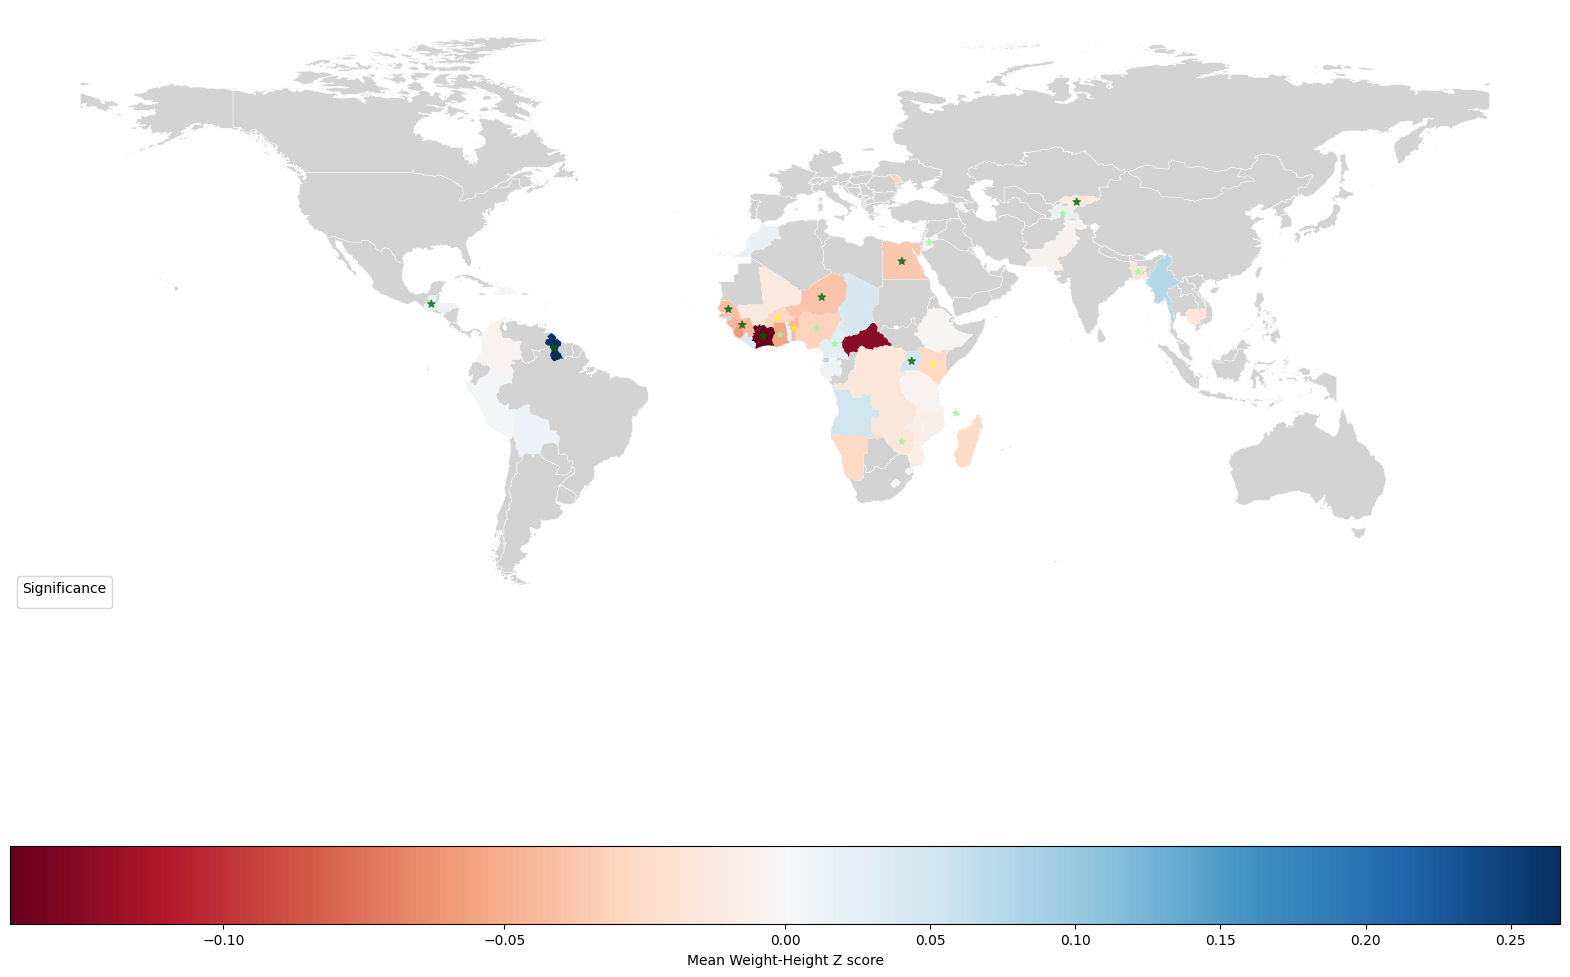

In [ ]:
districts_subset = df_WB3.cx[merged__GEO_Country_W_A.total_bounds[0]:merged__GEO_Country_W_A.total_bounds[2],merged__GEO_Country_W_A.total_bounds[1]:merged__GEO_Country_W_A.total_bounds[3]]

vmin, vmax, vcenter = merged__GEO_Country_W_A.Month_Temp.min(), merged__GEO_Country_W_A.Month_Temp.max(), 0
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

ax = districts_subset.plot(color='lightgray', edgecolor='white',linewidth=0.3,figsize=(20,20))

merged__GEO_Country_W_A.plot(column='Month_Temp', ax=ax, legend=True,cmap='RdBu' , norm = norm, figsize=(10,10),legend_kwds={'label': "Mean Weight-Height Z score",'orientation': "horizontal"})

merged__GEO_Country_W_A_copy.plot(ax=ax,color=merged__GEO_Country_W_A_copy['color'],marker='*', markersize="Sig_Count_temp",alpha=0.7, categorical=False, legend=True)
#plt.legend(title='Significance')

ax.set_axis_off()

plt.show()

NameError: ignored

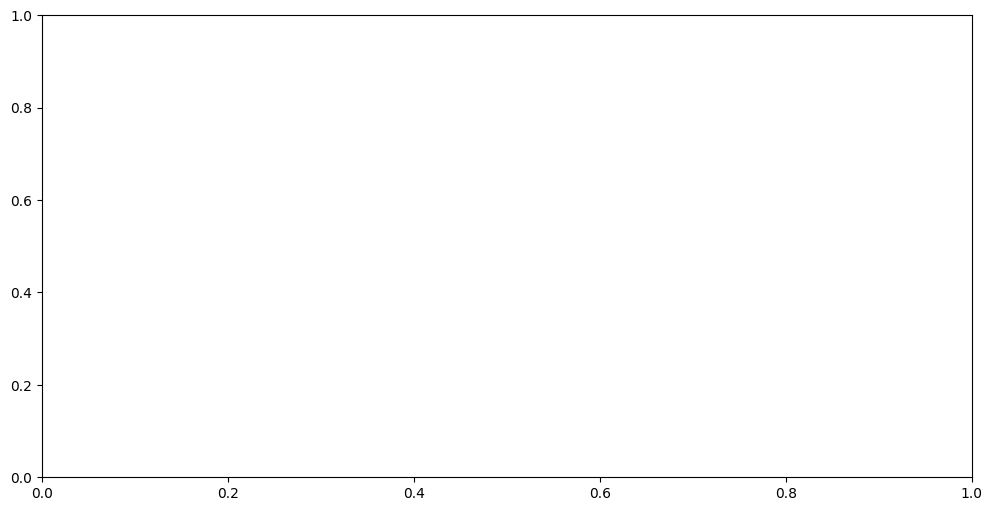

In [ ]:
import matplotlib.patches as mpatches
fig1, ax1 = plt.subplots(figsize=(12, 6))
bar= plt.bar(merged__GEO_Country_W_A.Country, merged__GEO_Country_W_A.Month_Temp, color=merged__GEO_Country_W_A.color)
NS = mpatches.Patch(color='blue', label='No significant')
S5 = mpatches.Patch(color='palegreen', label='Significant at 5%')
S10 = mpatches.Patch(color='yellow', label='Significant at 10%')
S1 = mpatches.Patch(color='darkgreen', label='Significant at 1%')

plt.legend(handles=[S1,S5,S10,NS], loc=2)

plt.xticks(rotation=90)


#handles = [plt.Rectangle((0,0),1,1, color=merged__GEO_Country_W_A[merged__GEO_Country_W_A['Sig_Count_temp']==label]['color'].iloc[0]) for label in leg_labels]

plt.show()

In [ ]:
leg_labels

array(['blue', 'palegreen', 'yellow', 'darkgreen'], dtype=object)

# **OTHER**

In [ ]:
 incidents=pd.read_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/Fire_Incidents.csv')


<ipython-input-4-79b975c9817c>:1: DtypeWarning: Columns (10,12,13,20,38,45,46,55,59) have mixed types. Specify dtype option on import or set low_memory=False.
  incidents=pd.read_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/Fire_Incidents.csv')


In [ ]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623769 entries, 0 to 623768
Data columns (total 66 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Incident Number                               623769 non-null  int64  
 1   Exposure Number                               623769 non-null  int64  
 2   ID                                            623769 non-null  int64  
 3   Address                                       623455 non-null  object 
 4   Incident Date                                 623769 non-null  object 
 5   Call Number                                   623769 non-null  int64  
 6   Alarm DtTm                                    623769 non-null  object 
 7   Arrival DtTm                                  623713 non-null  object 
 8   Close DtTm                                    623766 non-null  object 
 9   City                                          62

In [ ]:
incidents['latitude'] = incidents['point'].str.split(' ').str[2].str.strip(')')
incidents['longitude'] = incidents['point'].str.split(' ').str[1].str.strip('(')

In [ ]:
incidents[['latitude','longitude']] = incidents[['latitude','longitude']].astype(float)


In [ ]:
filtered_df = incidents[incidents['Incident Date'].str.contains('2022')]
filtered_df2 = filtered_df[filtered_df['Primary Situation'].str.contains('Building fire')]
filtered_df2

,Incident Number,Exposure Number,ID,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,...,Automatic Extinguishing System Present,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,neighborhood_district,point,latitude,longitude
573097,22009118,0,220091180,3663 17TH STREET,2022-01-19T00:00:00,220191966,2022-01-19T14:33:28,2022-01-19T14:35:46,2022-01-19T15:05:14,San Francisco,...,N None Present,NaN,NaN,NaN,NaN,NaN,Castro/Upper Market,POINT (-122.427691 37.762871),37.762871,-122.427691
573111,22020918,0,220209180,1451 LARKIN STREET,2022-02-13T00:00:00,220442871,2022-02-13T20:17:05,2022-02-13T20:19:16,2022-02-14T08:46:59,San Francisco,...,1 Present,1 Wet-pipe sprinkler system,1 System operated and was effective,NaN,2.0,3.0,Nob Hill,POINT (-122.41922 37.791244),37.791244,-122.419220
573379,22025864,1,220258641,525 6TH ST,2022-02-25T00:00:00,220561085,2022-02-26T10:50:50,2022-02-26T10:55:51,2022-02-26T11:54:48,San Francisco,...,U Undetermined,NaN,NaN,NaN,NaN,NaN,South of Market,POINT (-122.402057 37.775761),37.775761,-122.402057
573686,22011253,0,220112530,433 ELLIS STREET,2022-01-24T00:00:00,220240526,2022-01-24T07:31:24,2022-01-24T07:33:17,2022-01-24T08:12:44,San Francisco,...,1 Present,1 Wet-pipe sprinkler system,3 Fire too small to activate system,NaN,NaN,5.0,Tenderloin,POINT (-122.413339 37.784726),37.784726,-122.413339
574233,22024224,0,220242240,631 OFARRELL STREET,2022-02-21T00:00:00,220521528,2022-02-21T13:13:26,2022-02-21T13:15:38,2022-02-21T13:46:49,San Francisco,...,1 Present,U Undetermined,1 System operated and was effective,NaN,1.0,5.0,Tenderloin,POINT (-122.414924 37.785475),37.785475,-122.414924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617273,22151632,0,221516320,1160 GRANT AVENUE,2022-11-23T00:00:00,223270409,2022-11-23T06:42:53,2022-11-23T07:07:35,2022-11-23T07:23:13,San Francisco,...,U Undetermined,NaN,NaN,NaN,NaN,NaN,Chinatown,POINT (-122.406888 37.797612),37.797612,-122.406888
617299,22161594,0,221615940,121 BRODERICK STREET,2022-12-13T00:00:00,223472302,2022-12-13T15:24:36,2022-12-13T15:27:03,2022-12-13T16:25:57,San Francisco,...,N None Present,NaN,NaN,NaN,NaN,NaN,Haight Ashbury,POINT (-122.438843 37.771276),37.771276,-122.438843
617341,22164345,0,221643450,274 COLERIDGE STREET,2022-12-19T00:00:00,223530271,2022-12-19T03:31:10,2022-12-19T03:34:48,2022-12-19T04:05:41,San Francisco,...,N None Present,NaN,NaN,NaN,NaN,NaN,Bernal Heights,POINT (-122.420853 37.742094),37.742094,-122.420853
617343,22166183,0,221661830,1479 35TH AVENUE,2022-12-23T00:00:00,223570109,2022-12-23T01:26:58,2022-12-23T01:31:29,2022-12-23T03:23:30,San Francisco,...,N None Present,NaN,NaN,NaN,NaN,NaN,Sunset/Parkside,POINT (-122.494126 37.759493),37.759493,-122.494126


In [ ]:
situation = filtered_df['Property Use'].unique()
situation

array(['NNN None', '439 Boarding/rooming house, residential hotels',
       '429 Multifamily dwelling',
       '963 Street or road in commercial area',
       '419 1 or 2 family dwelling', '500 Mercantile, business, other',
       '141 Athletic/health club', '000 Property Use, other',
       '962 Residential street, road or residential driveway',
       '400 Residential, other', '960 Street, other',
       '961 Highway or divided highway',
       '581 Department or discount store', '880 Vehicle storage, other',
       '808 Outbuilding or shed', '331 Hospital - medical or psychiatric',
       'UUU Undetermined', '599 Business office',
       '449 Hotel/motel, commercial', '592 Bank',
       '580 General retail, other', '921 Bridge, trestle',
       '941 Open ocean, sea or tidal waters',
       '571 Service station, gas station',
       '213 Elementary school, including kindergarten',
       '150 Public or government, other', '100 Assembly, other',
       '519 Food and beverage sales, gr

In [ ]:
filtered_df2.to_csv('/content/drive/MyDrive/MASTERS/Thesis_Python/Fire_Incidents2022.csv')